# Final Group Project - New York Airbnb Analytics

Eunice  
Fandi   
Pascal   
Shivangi   
Vivek   

# 1 - Framing the Problem

Airbnb operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. It allows people (hosts) to list their propoerties for short-term rentals and earns money through the commission for each booking. The business model is based on the idea that these rentals are cheaper than hotels, making the company a threat to hotel industry. The value proposition to hosts is side income, while for the guests it is cheaper accomodation. 

The market of these short-term rentals in a city is highly competitive because renters are presented with a broad range of selection of listings for their specific criteria. Since Airbnb is a marketplace, the dynamics of marketplace have a huge influence on the the amount a host can charge on a nightly basis. This is in fact one of the biggest challenges for the hosts: deciding the prices for their listing. If they charge above the market place, they will lose out on revenue as the renters will most liklely find another affordable alternatives. If the price is set too low, then they again lose out on profits. Additionally, renters may lose out on the opprtunity to live at a great place. 

For this project, our goal is build a regression model that can accurately predict the price of the listing, which will help hosts to decide what price they should list their property at. Additionally, the machine learning algorithms will also provide insighst into what factors influence the pricing of these rentals. If they are something that can be controlled by the hosts, then they can use the insghts from this analysis to improve those factors and provide better accomodation to guests. For the scope of this project, we will only be looking at properties in New York considering that New York is a highly competitive marketplace for Airbnb. The dataset that we have used is from the website below:

Hypothesis:

Link to the dataset:http://insideairbnb.com/get-the-data.html

**This project was started afresh and was not continuation from first semester


# #Setup
**IMPORT PACKAGES**

In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

#Pandas Profiling
#!pip install pandas_profiling
import pandas_profiling

# To plot pretty figures
#!pip install -U seaborn
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
import gc
warnings.simplefilter(action='ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

#Display multiple outputs per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# 1) Data Acquisition

**IMPORT DATA**

In [4]:
import pandas as pd
df1=pd.read_csv('http://data.insideairbnb.com/united-states/ny/new-york-city/2021-02-04/data/listings.csv.gz')

In [5]:
df1.head()

id                        listing_url       scrape_id last_scraped  \
0  2595  https://www.airbnb.com/rooms/2595  20210204180331   2021-02-05   
1  3831  https://www.airbnb.com/rooms/3831  20210204180331   2021-02-05   
2  5121  https://www.airbnb.com/rooms/5121  20210204180331   2021-02-05   
3  5178  https://www.airbnb.com/rooms/5178  20210204180331   2021-02-05   
4  5203  https://www.airbnb.com/rooms/5203  20210204180331   2021-02-06   

                                                name  \
0                              Skylit Midtown Castle   
1  Whole flr w/private bdrm, bath & kitchen(pls r...   
2                                    BlissArtsSpace!   
3                   Large Furnished Room Near B'way　   
4                 Cozy Clean Guest Room - Family Apt   

                                         description  \
0  Beautiful, spacious skylit studio in the heart...   
1  Enjoy 500 s.f. top floor in 1899 brownstone, w...   
2  <b>The space</b><br />HELLO EVERYONE AND THANK...   
3  Please don’t expect the luxury here just a bas...   
4  Our best guests are seeking a safe, clean, spa...   

                               neighborhood_overview  \
0  Centrally located in the heart of Manhattan ju...   
1  Just the right mix of urban center and local n...   
2                                                NaN   
3    Theater district, many restaurants around here.   
4  Our neighborhood is full of restaurants and ca...   

                                         picture_url  host_id  \
0  https://a0.muscache.com/pictures/f0813a11-40b2...     2845   
1  https://a0.muscache.com/pictures/e49999c2-9fd5...     4869   
2  https://a0.muscache.com/pictures/2090980c-b68e...     7356   
3  https://a0.muscache.com/pictures/12065/f070997...     8967   
4  https://a0.muscache.com/pictures/103776/b37157...     7490   

                                 host_url  ... review_scores_communication  \
0  https://www.airbnb.com/users/show/2845  ...                        10.0   
1  https://www.airbnb.com/users/show/4869  ...                        10.0   
2  https://www.airbnb.com/users/show/7356  ...                        10.0   
3  https://www.airbnb.com/users/show/8967  ...                         9.0   
4  https://www.airbnb.com/users/show/7490  ...                        10.0   

  review_scores_location review_scores_value license instant_bookable  \
0                   10.0                 9.0     NaN                f   
1                   10.0                10.0     NaN                f   
2                    9.0                 9.0     NaN                f   
3                   10.0                 9.0     NaN                f   
4                   10.0                10.0     NaN                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                              2                                           2   
1                              1                                           1   
2                              1                                           0   
3                              1                                           0   
4                              1                                           0   

  calculated_host_listings_count_private_rooms  \
0                                            0   
1                                            0   
2                                            1   
3                                            1   
4                                            1   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              0.35  
1                                           0              4.99  
2                                           0              0.35  
3                                           0              3.31  
4                                           0              0.85  

[5 rows x 74 columns]

In [6]:
df1.shape 

(37012, 74)

**DATA DICTIONARY**

Since there was no official data dictionary, we used Airbnb's webiste to interpret some of the features. Considering there are 74 variables including a lot of variables such a different ids and urls and granular information regarding host (id, url, picture_url etc.) that would not be used in the analysis, we decided to drop some of these. We have only provided dictionary for the variables that we will be using and are not explainable by their names.

In [7]:
df1.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [8]:
df1 = df1.drop(columns = ['id', 'listing_url', 'scrape_id',
       'picture_url', 'host_id', 'host_url', 'host_name','host_location',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'neighbourhood',
       'bathrooms', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'calendar_last_scraped', 'number_of_reviews_l30d', 'license',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'])

df1.head()

last_scraped                                               name  \
0   2021-02-05                              Skylit Midtown Castle   
1   2021-02-05  Whole flr w/private bdrm, bath & kitchen(pls r...   
2   2021-02-05                                    BlissArtsSpace!   
3   2021-02-05                   Large Furnished Room Near B'way　   
4   2021-02-06                 Cozy Clean Guest Room - Family Apt   

                                         description  \
0  Beautiful, spacious skylit studio in the heart...   
1  Enjoy 500 s.f. top floor in 1899 brownstone, w...   
2  <b>The space</b><br />HELLO EVERYONE AND THANK...   
3  Please don’t expect the luxury here just a bas...   
4  Our best guests are seeking a safe, clean, spa...   

                               neighborhood_overview  host_since  \
0  Centrally located in the heart of Manhattan ju...  2008-09-09   
1  Just the right mix of urban center and local n...  2008-12-07   
2                                                NaN  2009-02-03   
3    Theater district, many restaurants around here.  2009-03-03   
4  Our neighborhood is full of restaurants and ca...  2009-02-05   

                                          host_about  host_response_time  \
0  A New Yorker since 2000! My passion is creatin...  within a few hours   
1  Laid-back Native New Yorker (formerly bi-coast...  within a few hours   
2   I am an artist(painter, filmmaker) and curato...                 NaN   
3  I used to work for a financial industry but no...        within a day   
4  Welcome to family life with my oldest two away...                 NaN   

  host_response_rate host_acceptance_rate host_is_superhost  ...  last_review  \
0                93%                  26%                 f  ...   2019-11-04   
1                98%                  93%                 f  ...   2021-01-27   
2                NaN                  NaN                 f  ...   2019-12-02   
3               100%                 100%                 f  ...   2020-09-25   
4                NaN                  NaN                 f  ...   2017-07-21   

  review_scores_rating review_scores_accuracy review_scores_cleanliness  \
0                 94.0                    9.0                       9.0   
1                 90.0                   10.0                       9.0   
2                 90.0                    8.0                       8.0   
3                 84.0                    9.0                       8.0   
4                 98.0                   10.0                      10.0   

  review_scores_checkin review_scores_communication  review_scores_location  \
0                  10.0                        10.0                    10.0   
1                   9.0                        10.0                    10.0   
2                  10.0                        10.0                     9.0   
3                   9.0                         9.0                    10.0   
4                  10.0                        10.0                    10.0   

   review_scores_value instant_bookable reviews_per_month  
0                  9.0                f              0.35  
1                 10.0                f              4.99  
2                  9.0                f              0.35  
3                  9.0                f              3.31  
4                 10.0                f              0.85  

[5 rows x 45 columns]

In [9]:
df1.columns

Index(['last_scraped', 'name', 'description', 'neighborhood_overview',
       'host_since', 'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month'],
      dt

The first few variables are related to host, which include his/her details like their response rate, information regarding their profile. Then the next few variables are regarding the property itself. The next few variables are not very intuitive and their description is given below: 

accommodates - how many people the property accommodates
<br>minimum_nights - number of minimum nights guests have to stay 
<br>maximum_nights - number of maximum nights guests are allowed to stay
<br>number_of_reviews_ltm - Number of reviews in last 12 months
<br>number_of_reviews_l30d - umber of reviews in last 30 days
<br>first_review - Date first review was posted 
<br>last_review - Date last review was posted 
<br>review_scores_rating - Rating of host for overall experience
<br>review_scores_accuracy - Rating of host for accuracy of listings
<br> review_scores_cleanliness - Rating of host for cleanliness
<br>review_scores_checkin - Rating of host for checking experience
<br> review_scores_communication - Rating of host for communication
<br>review_scores_location - Rating score for location
<br>review_scores_value - Rating for property's worth (value)
<br>instant_bookable - If property can be instantly booked  (i.e. booked straight away, without having to message the host first and wait to be accepted)
<br>reviews_per_month - Reviews per month

# 2 - Exploratory Data Analysis

## A) Data Exploration

**CHECK DATA TYPES**

In [10]:
df1.dtypes

last_scraped                     object
name                             object
description                      object
neighborhood_overview            object
host_since                       object
host_about                       object
host_response_time               object
host_response_rate               object
host_acceptance_rate             object
host_is_superhost                object
host_total_listings_count       float64
host_verifications               object
host_has_profile_pic             object
host_identity_verified           object
neighbourhood_cleansed           object
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
accommodates                      int64
bathrooms_text                   object
bedrooms                        float64
beds                            float64
amenities                        object


We observe that, the following columns need to be changed to the correect data type.
<br> - first_review, host_since, last_review --> changed to 'date'.
<br>- host_response_rate, host_acceptance_rate, price --> changed to a 'numerical' column

In [11]:
#change variables to 'date' type
df1['host_since']=pd.to_datetime(df1['host_since'])
df1['first_review']=pd.to_datetime(df1['first_review'])
df1['last_review']=pd.to_datetime(df1['last_review'])
df1.dtypes

last_scraped                            object
name                                    object
description                             object
neighborhood_overview                   object
host_since                      datetime64[ns]
host_about                              object
host_response_time                      object
host_response_rate                      object
host_acceptance_rate                    object
host_is_superhost                       object
host_total_listings_count              float64
host_verifications                      object
host_has_profile_pic                    object
host_identity_verified                  object
neighbourhood_cleansed                  object
neighbourhood_group_cleansed            object
latitude                               float64
longitude                              float64
property_type                           object
room_type                               object
accommodates                             int64
bathrooms_tex

In [12]:
#change variables to numerical
#get all the non-null values and Convert the object datatype to numerical datatype: host_response_rate, host_acceptance_rate
df1['host_response_rate'] = df1['host_response_rate'].astype(str).str.replace('%', '').astype(float)
df1['host_acceptance_rate'] = df1['host_acceptance_rate'].astype(str).str.replace('%', '').astype(float)
df1['price'] = df1['price'].str.replace(',', '').str.replace('$', '').astype(float)

Text(0.5, 1.0, 'Number of columns by data types')

Text(0.5, 0, 'Number of columns')

Text(0, 0.5, 'Data type')

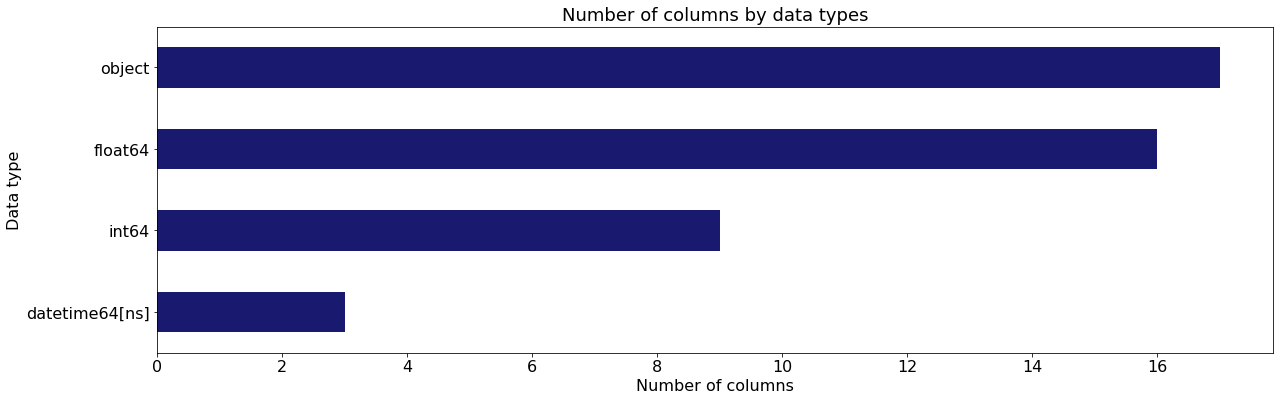

In [13]:
df1.dtypes.value_counts().sort_values().plot(kind='barh',
                                            figsize=(20, 6),
                                            fontsize=16,
                                           color="midnightblue")

plt.title('Number of columns by data types', fontsize=18)
plt.xlabel('Number of columns', fontsize=16)
plt.ylabel('Data type', fontsize=16)

**SUMMARY STATISTICS**

In [14]:
df1.describe()

host_response_rate  host_acceptance_rate  host_total_listings_count  \
count        18505.000000          22379.000000               36994.000000   
mean            88.525588             80.471245                  23.974158   
std             25.023465             28.085157                 158.224860   
min              0.000000              0.000000                   0.000000   
25%             90.000000             73.000000                   1.000000   
50%            100.000000             94.000000                   1.000000   
75%            100.000000            100.000000                   2.000000   
max            100.000000            100.000000                2739.000000   

           latitude     longitude  accommodates      bedrooms          beds  \
count  37012.000000  37012.000000  37012.000000  33404.000000  36522.000000   
mean      40.729653    -73.950989      2.797633      1.316399      1.533925   
std        0.054710      0.048291      1.845570      0.722094      1.141557   
min       40.508680    -74.239860      0.000000      1.000000      0.000000   
25%       40.690320    -73.983812      2.000000      1.000000      1.000000   
50%       40.725465    -73.955790      2.000000      1.000000      1.000000   
75%       40.762480    -73.933720      4.000000      1.000000      2.000000   
max       40.912140    -73.710870     16.000000     21.000000     42.000000   

              price  minimum_nights  ...  number_of_reviews  \
count  37012.000000    37012.000000  ...       37012.000000   
mean     142.842240       23.323679  ...          22.904112   
std      275.740987       26.441255  ...          47.864720   
min        0.000000        1.000000  ...           0.000000   
25%       60.000000        4.000000  ...           0.000000   
50%       99.000000       30.000000  ...           4.000000   
75%      151.000000       30.000000  ...          20.000000   
max    10000.000000     1250.000000  ...         753.000000   

       number_of_reviews_ltm  review_scores_rating  review_scores_accuracy  \
count           37012.000000          26777.000000            26753.000000   
mean                2.752648             93.767188                9.586551   
std                 9.582048              9.594491                0.938881   
min                 0.000000             20.000000                2.000000   
25%                 0.000000             92.000000                9.000000   
50%                 0.000000             97.000000               10.000000   
75%                 2.000000            100.000000               10.000000   
max               514.000000            100.000000               10.000000   

       review_scores_cleanliness  review_scores_checkin  \
count               26764.000000           26741.000000   
mean                    9.268009               9.721140   
std                     1.146266               0.823948   
min                     2.000000               2.000000   
25%                     9.000000              10.000000   
50%                    10.000000              10.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       review_scores_communication  review_scores_location  \
count                 26755.000000            26740.000000   
mean                      9.712801                9.599589   
std                       0.859563                0.794767   
min                       2.000000                2.000000   
25%                      10.000000                9.000000   
50%                      10.000000               10.000000   
75%                      10.000000               10.000000   
max                      10.000000               10.000000   

       review_scores_value  reviews_per_month  
count         26740.000000       27489.000000  
mean              9.367539           0.867197  
std               1.014201           1.320503  
min               2.000000           0

**PANDAS PROFILING**

In [15]:
#Generate a HTML report
profile = df1.profile_report(title='Pandas Profiling Report')
#profile

profile.to_file(output_file="profile_report_output.html")

Summarize dataset:   0%|          | 0/58 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Insights from the profile report: 
<br>1. A lot of variables regarding host have missing values; bathrooms variables is all null values
<br>2. Room type and propert type are highly correlated 
<br>3. Avialbility_30, Availability_60 and Availability_90 are highly correlated 

**SOME DATA CLEANING**

A lot of variables include text, hence, they will be need to processed by either modifying them or creating new variables out of them. Most of these columns included description regarding the property or neighbourhood or about the host. Some columns are just dates so having differences between those dates would be more useful. 

In [16]:
#=======================================================Data Cleansing===================================================
#Only pick the Airbnb apartment with reviews
#df1=df1[df1['number_of_reviews'].astype(int)>0]

#Only pick the Airbnb apartment with price
#df1=df1[df1['price']>0]

#Only pick the Airbnb with the answer(t/f) for "host_is_superhost"
#df1=df1[df1['host_is_superhost'].apply(lambda x: len(str(x))==1)]

#Drop other answer except f/t in "instant_bookable"
#df1=df1[df1['instant_bookable'].isin(['f','t'])]

#To drop the review score which lower than 21 (potential outliers)
#df1=df1[df1['review_scores_rating']>21]

#Replace all the blank cell with NaN value
df1=df1.replace('',np.NaN)

#========================================================Add new features===============================================

#Get the length of the sentence in following five columns (number of words)
df1['name_length']  = df1['name'].apply(lambda x: len(str(x).split()))
df1['description_length']=df1['description'].apply(lambda x: len(str(x).split()))
df1['host_about_length']=df1['host_about'].apply(lambda x: len(str(x).split()))
df1['verifications_length']=df1['host_verifications'].apply(lambda x: len(str(x).split(',')))
df1['amenities_length']=df1['amenities'].apply(lambda x: len(str(x).split(',')))

#Get the difference between the "last_scraped" with the following dates (in days)
df1['host_since_days'] = (pd.to_datetime(df1['last_scraped'])-pd.to_datetime(df1['host_since'])).dt.days
df1['first_review_days'] = (pd.to_datetime(df1['last_scraped'])-pd.to_datetime(df1['first_review'])).dt.days
df1['last_review_days'] = (pd.to_datetime(df1['last_scraped'])-pd.to_datetime(df1['last_review'])).dt.days

#drop 'last_scraped, host_since, first_reviews, last_review'
df1 = df1.drop(columns = ['last_scraped', 'host_since','first_review','last_review'])
                          
#Get the new column to express the price per accommodate
df1['price_per_accommodates']=df1['price']/df1['accommodates'].astype(float)
#=====================================================Change the data type=============================================
#Convert the categorical columns to dummified columns
list_col=['host_is_superhost','host_identity_verified','instant_bookable', 'host_has_profile_pic']
for i in list_col:
    df1[i] = np.where(df1[i]== 't', 1, 0)

**CHECK MISSING VALUES**

In [17]:
def missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    print("Dataframe has " + str(df.shape[1]) + " columns.")
    print("There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    return mis_val_table_ren_columns

# Missing values statistics
miss_values = missing_values(df1)
miss_values

Dataframe has 50 columns.
There are 23 columns that have missing values.


Missing Values  % of Total Values
host_response_time                    18507               50.0
host_response_rate                    18507               50.0
host_about                            14844               40.1
host_acceptance_rate                  14633               39.5
neighborhood_overview                 13683               37.0
review_scores_value                   10272               27.8
review_scores_location                10272               27.8
review_scores_checkin                 10271               27.8
review_scores_accuracy                10259               27.7
review_scores_communication           10257               27.7
review_scores_cleanliness             10248               27.7
review_scores_rating                  10235               27.7
reviews_per_month                      9523               25.7
first_review_days                      9523               25.7
last_review_days                       9523               25.7
bedrooms                               3608                9.7
description                            1223                3.3
beds                                    490                1.3
bathrooms_text                          102                0.3
host_total_listings_count                18                0.0
host_since_days                          18                0.0
name                                     13                0.0
price_per_accommodates                   13                0.0

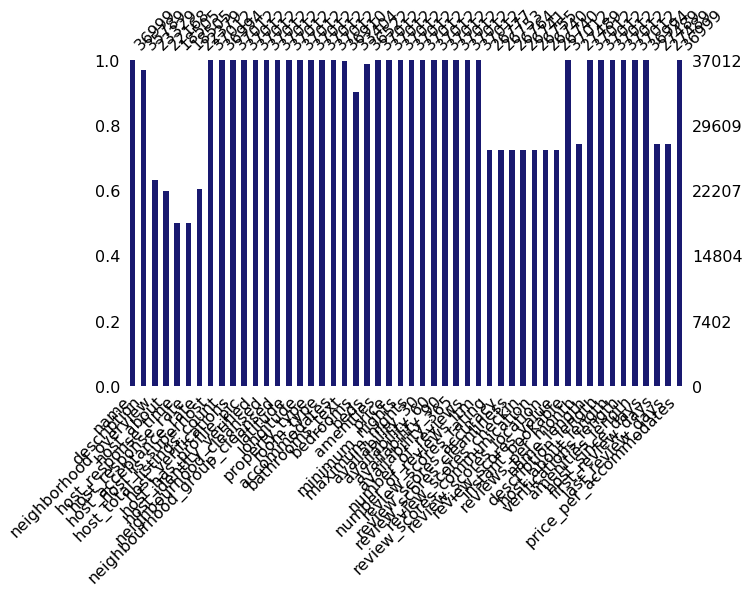

In [18]:
import missingno as msno
#msno.matrix(df.sample(500), figsize=(12,8))
msno.bar(df1, figsize=(10,6), color='midnightblue')

**TARGET VARIABLE**
Check distribution of 'Price' variable

In [19]:
#df1['price'].value_counts().plot(kind='bar', color='midnightblue')

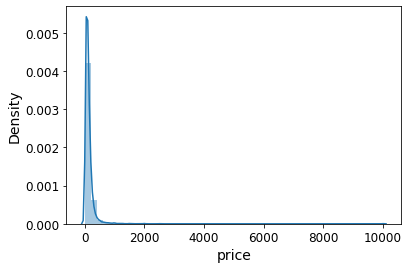

In [20]:
sns.distplot(df1.price)

The target variable is very heavily right skewed!

**CORRELATIONS between predictors and target variable**

In [21]:
corr = df1.corr()['price'].sort_values()
corr

longitude                     -0.101170
host_response_rate            -0.060710
number_of_reviews             -0.035886
reviews_per_month             -0.030737
host_acceptance_rate          -0.030403
verifications_length          -0.025068
number_of_reviews_ltm         -0.023899
host_identity_verified        -0.018834
host_is_superhost             -0.012657
review_scores_value           -0.007769
review_scores_checkin         -0.007539
host_has_profile_pic          -0.007348
description_length            -0.006389
host_about_length             -0.001419
instant_bookable              -0.000616
maximum_nights                -0.000235
review_scores_communication    0.001680
review_scores_accuracy         0.002778
name_length                    0.003577
host_since_days                0.019429
latitude                       0.019951
review_scores_rating           0.021382
minimum_nights                 0.023094
first_review_days              0.024820
review_scores_cleanliness      0.033119


**There is no multicollinearity between the target variable and the predictors. All correlation values are below 0.8**

**CATEGORICAL VARIABLES**

**Number of categories in each categorical variable**

In [22]:
df1.select_dtypes('object').apply(pd.Series.nunique, axis=0)

name                            35912
description                     33912
neighborhood_overview           19385
host_about                      15481
host_response_time                  4
host_verifications                524
neighbourhood_cleansed            220
neighbourhood_group_cleansed        5
property_type                      75
room_type                           4
bathrooms_text                     36
amenities                       31671
dtype: int64

In [23]:
df1['host_response_time'].value_counts()

within an hour        10143
within a few hours     3937
within a day           3039
a few days or more     1386
Name: host_response_time, dtype: int64

In [24]:
df1['neighbourhood_group_cleansed'].value_counts()

Manhattan        16553
Brooklyn         14474
Queens            4704
Bronx              992
Staten Island      289
Name: neighbourhood_group_cleansed, dtype: int64

In [25]:
df1['property_type'].value_counts()

Entire apartment              15506
Private room in apartment     12037
Private room in house          1897
Private room in townhouse      1044
Entire condominium              983
                              ...  
Private room in dome house        1
Shared room in floor              1
Private room in dorm              1
Private room in train             1
Private room in camper/rv         1
Name: property_type, Length: 75, dtype: int64

In [26]:
df1['room_type'].value_counts()

Entire home/apt    19397
Private room       16630
Shared room          686
Hotel room           299
Name: room_type, dtype: int64

### Some Data Transformation
To make visualization easier and more insightful

**BATHROOM TEXT**

Deriving the number and type of bathroom from the 'bathroom_text' variable

In [27]:
df1['bathrooms_text']=df1['bathrooms_text'].astype(str)
df1['bathrooms_text']=df1['bathrooms_text'].replace('nan','nan nan')

df1['bathrooms_list']  = df1['bathrooms_text'].apply(lambda x: (x.split(" ", 1)))
df1['bathrooms_list']

new_val=[]
for lst in np.array(df1['bathrooms_list']):
    if len(lst)!=2:
        lst.append(" ")
    new_val.append(lst)
    
df1['bathrooms_list']=new_val
list_num=[]
list_name=[]
for i in np.array(df1['bathrooms_list']):
    list_num.append(i[0])
    list_name.append(i[1])
df1['num_bath']=list_num
df1['name_bath']=list_name

df1=df1.drop('bathrooms_list',axis=1)

0               [1, bath]
1               [1, bath]
2              [nan, nan]
3               [1, bath]
4        [1, shared bath]
               ...       
37007           [1, bath]
37008    [1, shared bath]
37009    [1, shared bath]
37010    [1, shared bath]
37011    [1, shared bath]
Name: bathrooms_list, Length: 37012, dtype: object

In [28]:
df1['num_bath'].value_counts().head(20)

#Replace some values to make them numerical
df1['num_bath'] = df1['num_bath'].replace({'Half-bath': 0.5, 'Shared':0.5, 'Private':1})

df1['num_bath'].value_counts().head(20)

1            30654
2             3245
1.5           1802
2.5            400
3              322
0              164
nan            102
4               97
3.5             74
Half-bath       36
4.5             25
Shared          18
Private         17
5               16
6               15
8                9
5.5              5
6.5              4
7.5              3
7                3
Name: num_bath, dtype: int64

1       30654
2        3245
1.5      1802
2.5       400
3         322
0         164
nan       102
4          97
3.5        74
0.5        54
4.5        25
1          17
5          16
6          15
8           9
5.5         5
6.5         4
7.5         3
7           3
15.5        1
Name: num_bath, dtype: int64

In [29]:
df1['name_bath'].value_counts().head(20)

#replace some duplicate categories
df1['name_bath'] = df1['name_bath'].replace({'shared baths': 'shared bath', 'baths':'private bath', 'bath':'private bath'})

df1['name_bath'].value_counts().head(20)

bath            19138
shared bath      9420
baths            3992
shared baths     2193
private bath     2096
nan               102
                   36
half-bath          35
Name: name_bath, dtype: int64

private bath    25226
shared bath     11613
nan               102
                   36
half-bath          35
Name: name_bath, dtype: int64

**SENTIMENT SCORE OF HOST AND PROPERTY DESCRIPTIONS**

In [30]:
#!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score['compound']

In [31]:
dfa=df1[['name','description','neighborhood_overview','host_about']]
dfa['name'] = dfa['name'].fillna("Unknown")
dfa['description'] = dfa['description'].fillna("Unknown")
dfa['neighborhood_overview'] = dfa['neighborhood_overview'].fillna("Unknown")
dfa['host_about'] = dfa['host_about'].fillna("Unknown")

In [32]:
dfa['name_sentiment'] = dfa.apply(lambda row : sentiment_analyzer_scores(row['name']), axis = 1)
dfa['description_sentiment'] = dfa.apply(lambda row : sentiment_analyzer_scores(row['description']), axis = 1)
dfa['neighborhood_sentiment'] = dfa.apply(lambda row : sentiment_analyzer_scores(row['neighborhood_overview']), axis = 1)
dfa['hostabout_sentiment'] = dfa.apply(lambda row : sentiment_analyzer_scores(row['host_about']), axis = 1)

In [33]:
dfa['sentiment'] = (dfa['name_sentiment']+dfa['description_sentiment']+dfa['neighborhood_sentiment']+dfa['hostabout_sentiment'])/4
dfa['sentiment']

0        0.667450
1        0.533675
2        0.488675
3        0.227500
4        0.592700
           ...   
37007    0.000000
37008    0.114700
37009    0.760800
37010    0.860875
37011    0.437025
Name: sentiment, Length: 37012, dtype: float64

In [34]:
#Add the sentiment values into the dataframe
df1['total_sentiment'] = np.NaN
df1['name_sentiment'] = np.NaN
df1['description_sentiment'] = np.NaN
df1['neighborhood_sentiment'] = np.NaN
df1['hostabout_sentiment'] = np.NaN
df1['total_sentiment'].loc[dfa.index] = dfa['sentiment']
df1['name_sentiment'].loc[dfa.index] = dfa['name_sentiment']
df1['description_sentiment'].loc[dfa.index] = dfa['description_sentiment']
df1['neighborhood_sentiment'].loc[dfa.index] = dfa['neighborhood_sentiment']
df1['hostabout_sentiment'].loc[dfa.index] = dfa['hostabout_sentiment']
df1

name  \
0                                  Skylit Midtown Castle   
1      Whole flr w/private bdrm, bath & kitchen(pls r...   
2                                        BlissArtsSpace!   
3                       Large Furnished Room Near B'way　   
4                     Cozy Clean Guest Room - Family Apt   
...                                                  ...   
37007  Cozy One-Bedroom with Full Kitchen Near Manhattan   
37008                                Grand Concourse Gem   
37009       Natural Light-Filled Home in Upper East Side   
37010    Spacious Living in the Heart of Upper East Side   
37011   Find Cozy in this Upper West Side Furnished Home   

                                             description  \
0      Beautiful, spacious skylit studio in the heart...   
1      Enjoy 500 s.f. top floor in 1899 brownstone, w...   
2      <b>The space</b><br />HELLO EVERYONE AND THANK...   
3      Please don’t expect the luxury here just a bas...   
4      Our best guests are seeking a safe, clean, spa...   
...                                                  ...   
37007                                                NaN   
37008                                                NaN   
37009  Private room with Queen bed in a 4 bedroom, 4 ...   
37010  Private room with Queen bed in a 2 bedroom, 1 ...   
37011  Private room with Queen bed in a 3 bedroom, 2 ...   

                                   neighborhood_overview  \
0      Centrally located in the heart of Manhattan ju...   
1      Just the right mix of urban center and local n...   
2                                                    NaN   
3        Theater district, many restaurants around here.   
4      Our neighborhood is full of restaurants and ca...   
...                                                  ...   
37007                                                NaN   
37008                                                NaN   
37009  Welcome to The Upper East Side – located north...   
37010  Welcome to The Upper East Side – located north...   
37011                                                NaN   

                                              host_about  host_response_time  \
0      A New Yorker since 2000! My passion is creatin...  within a few hours   
1      Laid-back Native New Yorker (formerly bi-coast...  within a few hours   
2       I am an artist(painter, filmmaker) and curato...                 NaN   
3      I used to work for a financial industry but no...        within a day   
4      Welcome to family life with my oldest two away...                 NaN   
...                                                  ...                 ...   
37007                                                NaN      within an hour   
37008  Native New Yorker\nEclectic dabbler (writer, p...                 NaN   
37009  At June Homes, our mission is to make renting ...      within an hour   
37010  At June Homes, our mission is to make renting ...      within an hour   
37011  At June Homes, our mission is to make renting ...      within an hour   

       host_response_rate  host_acceptance_rate  host_is_superhost  \
0                    93.0                  26.0                  0   
1                    98.0                  93.0                  0   
2                     NaN                   NaN                  0   
3                   100.0                 100.0                  0   
4                     NaN                   NaN                  0   
...                   ...                   ...                ...   
37007               100.0                 100.0                  0   
37008                 NaN                   0.0                  0   
37009               100.0                  53.0                  0   
37010               100.0                  53.0                  0   
37011               100.0                  53.0                  0   

       host_total_listings_count  \
0                            6.0   
1              

**AMENITIES**

Amenities are all present in a list. Although we have calculated the length of list of amenities in a list, it would be useful to see what amenities are usually listed and make those categorical variables.

In [35]:
#creating set of all amenties
amenities = list(df1.amenities)
amenities_list = " ".join(amenities)
amenities_list = amenities_list.replace('[', '')
amenities_list = amenities_list.replace(']', ',')
amenities_list= amenities_list.replace('"', '')
amenities_set = [x.strip() for x in amenities_list.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '1 space',
 '100\\ HDTV with Netflix',
 '120\\ HDTV with Amazon Prime Video',
 '120\\ HDTV with Apple TV',
 '12\\ TV',
 '1802 Beekman toiletries',
 '2 burner induction cooktop.  We provide pots and pans. induction stove',
 '2 spaces',
 '2-5 years old',
 '20\\ TV with standard cable',
 '24-hour fitness center',
 '24\\ HDTV with Chromecast',
 '30\\ HDTV',
 '32\\ HDTV',
 '32\\ HDTV with Amazon Prime Video',
 '32\\ HDTV with Chromecast',
 '32\\ HDTV with HBO Max',
 '32\\ HDTV with Netflix',
 '32\\ HDTV with Roku',
 '32\\ TV',
 '36\\ TV',
 '36\\ TV with Chromecast',
 '37\\ HDTV with Netflix',
 '37\\ TV with Amazon Prime Video',
 '39\\ HDTV',
 '40\\ HDTV',
 '40\\ HDTV with Apple TV',
 '40\\ HDTV with Chromecast',
 '40\\ HDTV with Netflix',
 '40\\ HDTV with Roku',
 '40\\ HDTV with standard cable',
 '40\\ TV with Netflix',
 '40\\ TV with premium cable',
 '42\\ HDTV with Amazon Prime Video',
 '42\\ HDTV with Netflix',
 '42\\ HDTV with premium cable',
 '42\\ TV',
 '43\\ HDTV',
 '43\\ HDTV 

In the list above, some amenities are more important than others (e.g. a parking lot is more important that a shampoo). Based on research and personal experiences, some of the most important amentities will be selected. Some of the amenities such as wifi, stove top are standard across all listings so they weren't included in the list

The amenities chosen are (slashes indicate those categories that can be combined):

<br>Air conditioning/Central air conditioning
<br>BBQ grill
<br>Patio 
<br>beachfront/lake access
<br>Breakfast/Complimentary breakfast buffet/ Complimentary continental breakfast/ Complimentary hot breakfast
<br>Cable TV/TV
<br>Coffee maker/ Keurig coffee machine
<br>Breakfast/Complimentary breakfast buffet/ Complimentary continental breakfast/ Complimentary hot breakfast
<br>Cooking basics
<br>Dishwasher/Dryer/Washer
<br>Gym/Private gym/Shared gym/ Shared gym in building/
<br>Free parking on premises/Free street parking/outdoor parking/paid parking off premises/paid parking on premises
<br>Hot tub/Private hot tub/shared hot tub/Shared pool/Shared sauna/private hot tub
<br>Long term stays allowed
<br>Pets allowed
<br>Private entrance
<br>Safe/security system
<br>Microwave

In [36]:
import requests
import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\e_wor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\e_wor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\e_wor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
df = df1[['amenities']]
df.head()

df = df[df['amenities'].notnull()]

#expand contraction words
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

df['pros1'] = df.apply(lambda row : decontracted(row['amenities']), axis = 1)

#Tokenization the comments column
def token_(x):
    token = word_tokenize(x)
    return token
df['pros_token'] = df.apply(lambda row : token_(row['pros1']), axis = 1)

# Lower Casing the Tokenized comments
def lower_case(x):
    ret = []
    for words in x:
        words = words.lower()
        ret.append(words)
    return ret 
df['pros_token'] = df.apply(lambda row : lower_case(row['pros_token']), axis = 1)

# Removing Punctuation
import re 
punctutation = re.compile(r'[-.?!,:;()%\/|0-9""]')
def post_punctutation(x):
    ret = []
    for words in x:
        item = punctutation.sub("",words)
        if len(item)>0:
            ret.append(item)
    return ret 
df['pros_token'] = df.apply(lambda row : post_punctutation(row['pros_token']), axis = 1)
#len(df['Comment_token_punct'][0]), len(df['Comment_token'][0])

#Stopwords
stop_words = set(stopwords.words('english'))
def remove_stopwords(x):
    filtered_sentence = []  
    for w in x:
        if w not in stop_words:
            filtered_sentence.append(w)
    return filtered_sentence
df['pros_stopwords'] = df.apply(lambda row : remove_stopwords(row['pros_token']), axis = 1)
#len(df['Comment_token_punct_stopwords'][0]),len(df['Comment_token_punct'][0]),

#POS Tagging
nltk.download('averaged_perceptron_tagger')
df['pros_tags'] = df['pros_stopwords'].apply(nltk.tag.pos_tag)

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
df['wordnet_pos'] = df['pros_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

wnl = WordNetLemmatizer()
df['lemmatized'] = df['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])

# ALl the duplicate words will be removed from the text/comments including all the adjectives and verbs.
def unique_(test_list):
    res = [] 
    for i in test_list: 
        if i not in res: 
            res.append(i) 
    return res
df['pros_unique'] = df.apply(lambda row : unique_(row['lemmatized']), axis = 1)
#len(df['Comment_token_punct_stopwords_unique'][0]),len(df['lemmatized'][0]),

#select nouns only
df['nouns'] = df['wordnet_pos'].apply(lambda x: [word for (word, pos) in x if pos[0] == 'n'])

text_list=df['nouns'].tolist()
#print(text_list[0])


amenities
0  ["Refrigerator", "Air conditioning", "Baking s...
1  ["Refrigerator", "Microwave", "Shampoo", "High...
2  ["Wifi", "Heating", "Air conditioning", "Long ...
3  ["Extra pillows and blankets", "Hair dryer", "...
4  ["Hair dryer", "Breakfast", "Smoke alarm", "Es...

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\e_wor\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [38]:
#another method
from nltk.probability import FreqDist
fdist = FreqDist()
for i in range(len(df)):
    for word in text_list[i]:
        fdist[word]+=1
word_freqs2 = pd.DataFrame(fdist.items(), columns = ['word', 'frequency']).sort_values(by = ['frequency'], ascending = False)

word_freqs2.head(30)

word  frequency
3             ''     757063
1             ``     756941
14         alarm      59322
24         dryer      39216
39             ]      37012
30          wifi      36534
31       heating      34922
20         stays      34838
19          term      34838
29            tv      34457
26    essentials      33864
0              [      33032
4            air      31613
5   conditioning      31610
13       hangers      28048
36        carbon      26892
37      monoxide      26892
15     workspace      23924
23          hair      23805
40       shampoo      23533
12          iron      23174
18         water      21998
8        parking      20720
2   refrigerator      17069
27        dishes      16597
28    silverware      16597
60        washer      15691
52       kitchen      15334
33        basics      14838
16          fire      14437

In addition to the analysis above, we did some research and came up with the top amenities that most guests look for

In [39]:
list_name=['air_conditioning_available','bbq_available','patio','beach','breakfast_available',
           'tv_available','coffee_machine_available', 'cooking_basics','dishwasher_available',
           'washer and dryer_available','gym','parking','hot_tub_sauna_or_pool','long_term_stays_allowed',
           'pets_allowed','private_entrance','secure','microwave_available']

for i in list_name:
    df1[i]=[0]*len(df1)
df1.loc[df1['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning_available'] = 1
df1.loc[df1['amenities'].str.contains('BBQ grill'), 'bbq_available'] = 1
df1.loc[df1['amenities'].str.contains('Patio'), 'patio'] = 1
df1.loc[df1['amenities'].str.contains('Beachfront|Lake access'), 'beach'] = 1
df1.loc[df1['amenities'].str.contains('Breakfast|Complimentary breakfast buffet|Complimentary continental breakfast|Complimentary hot breakfast'), 'breakfast_available'] = 1
df1.loc[df1['amenities'].str.contains('TV|Cable TV'), 'tv_available'] = 1
df1.loc[df1['amenities'].str.contains('Coffee maker|Keurig coffee machine'), 'coffee_machine_available'] = 1
df1.loc[df1['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
df1.loc[df1['amenities'].str.contains('Dishwasher'), 'dishwasher_available'] = 1
df1.loc[df1['amenities'].str.contains('Dryer|Washer'), 'washer and dryer_available'] = 1
df1.loc[df1['amenities'].str.contains('Gym|gym|Gym/Private gym|Shared gym|Shared gym in building'), 'gym'] = 1
df1.loc[df1['amenities'].str.contains('Free parking on premises|Free street parking|outdoor parking|paid parking off premises|paid parking on premise'), 'parking'] = 1
df1.loc[df1['amenities'].str.contains('Hot tub|Private hot tub|shared hot tub|Shared pool|Shared sauna|private hot tub'), 'hot_tub_sauna_or_pool'] = 1
df1.loc[df1['amenities'].str.contains('Long term stays allowed'), 'long_term_stays_allowed'] = 1
df1.loc[df1['amenities'].str.contains('pets allowed'), 'pets_allowed'] = 1
df1.loc[df1['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
df1.loc[df1['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
df1.loc[df1['amenities'].str.contains('Microwave'), 'microwave_available'] = 1

In [40]:
df1

name  \
0                                  Skylit Midtown Castle   
1      Whole flr w/private bdrm, bath & kitchen(pls r...   
2                                        BlissArtsSpace!   
3                       Large Furnished Room Near B'way　   
4                     Cozy Clean Guest Room - Family Apt   
...                                                  ...   
37007  Cozy One-Bedroom with Full Kitchen Near Manhattan   
37008                                Grand Concourse Gem   
37009       Natural Light-Filled Home in Upper East Side   
37010    Spacious Living in the Heart of Upper East Side   
37011   Find Cozy in this Upper West Side Furnished Home   

                                             description  \
0      Beautiful, spacious skylit studio in the heart...   
1      Enjoy 500 s.f. top floor in 1899 brownstone, w...   
2      <b>The space</b><br />HELLO EVERYONE AND THANK...   
3      Please don’t expect the luxury here just a bas...   
4      Our best guests are seeking a safe, clean, spa...   
...                                                  ...   
37007                                                NaN   
37008                                                NaN   
37009  Private room with Queen bed in a 4 bedroom, 4 ...   
37010  Private room with Queen bed in a 2 bedroom, 1 ...   
37011  Private room with Queen bed in a 3 bedroom, 2 ...   

                                   neighborhood_overview  \
0      Centrally located in the heart of Manhattan ju...   
1      Just the right mix of urban center and local n...   
2                                                    NaN   
3        Theater district, many restaurants around here.   
4      Our neighborhood is full of restaurants and ca...   
...                                                  ...   
37007                                                NaN   
37008                                                NaN   
37009  Welcome to The Upper East Side – located north...   
37010  Welcome to The Upper East Side – located north...   
37011                                                NaN   

                                              host_about  host_response_time  \
0      A New Yorker since 2000! My passion is creatin...  within a few hours   
1      Laid-back Native New Yorker (formerly bi-coast...  within a few hours   
2       I am an artist(painter, filmmaker) and curato...                 NaN   
3      I used to work for a financial industry but no...        within a day   
4      Welcome to family life with my oldest two away...                 NaN   
...                                                  ...                 ...   
37007                                                NaN      within an hour   
37008  Native New Yorker\nEclectic dabbler (writer, p...                 NaN   
37009  At June Homes, our mission is to make renting ...      within an hour   
37010  At June Homes, our mission is to make renting ...      within an hour   
37011  At June Homes, our mission is to make renting ...      within an hour   

       host_response_rate  host_acceptance_rate  host_is_superhost  \
0                    93.0                  26.0                  0   
1                    98.0                  93.0                  0   
2                     NaN                   NaN                  0   
3                   100.0                 100.0                  0   
4                     NaN                   NaN                  0   
...                   ...                   ...                ...   
37007               100.0                 100.0                  0   
37008                 NaN                   0.0                  0   
37009               100.0                  53.0                  0   
37010               100.0                  53.0                  0   
37011               100.0                  53.0                  0   

       host_total_listings_count  \
0                            6.0   
1              

There are lot of additional features that have been added due to the dummy amentities' variables. To reduce this number, any category of amenities that contain less than 10% of the listings can be removed considering they are not adding much value anyway if they are that infrequent. 

In [41]:
df1.columns

Index(['name', 'description', 'neighborhood_overview', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month', 'name_length', 'description_length',
       'host_about_length', 'verificatio

In [43]:
# Replacing nulls with zeros for new columns
nulls_replace = df1.iloc[:,57:].columns
#nulls_replace_list = nulls_replace.to_list()
#df1[nulls_replace] = df1[nulls_replace].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
fewer_amenities = []
for col in nulls_replace:
    if df1[col].sum() < len(df1)/10:
        fewer_amenities.append(col)
print("Fewer amenities include", fewer_amenities)

# Dropping infrequent amenity features
test = df1.drop(columns=['bbq_available', 'patio', 'beach', 'breakfast_available', 'hot_tub_sauna_or_pool', 'pets_allowed', 'secure'], axis=1, inplace=True)

Fewer amenities include ['bbq_available', 'patio', 'beach', 'breakfast_available', 'hot_tub_sauna_or_pool', 'pets_allowed', 'secure']


In the pre-processing stage, we will need to delete the 'fewer amenities'

In [44]:
df1.shape

(37012, 68)

### B) Data Visualization

So far we have added all the necessary features. Now we can drop some features that might not be used in the analysis. We can also look for correlated variables and drop those.

In [45]:
#creating a new dataset so that if we need some columns later we can use df1

df2 = df1.copy(deep = True)
df2

name  \
0                                  Skylit Midtown Castle   
1      Whole flr w/private bdrm, bath & kitchen(pls r...   
2                                        BlissArtsSpace!   
3                       Large Furnished Room Near B'way　   
4                     Cozy Clean Guest Room - Family Apt   
...                                                  ...   
37007  Cozy One-Bedroom with Full Kitchen Near Manhattan   
37008                                Grand Concourse Gem   
37009       Natural Light-Filled Home in Upper East Side   
37010    Spacious Living in the Heart of Upper East Side   
37011   Find Cozy in this Upper West Side Furnished Home   

                                             description  \
0      Beautiful, spacious skylit studio in the heart...   
1      Enjoy 500 s.f. top floor in 1899 brownstone, w...   
2      <b>The space</b><br />HELLO EVERYONE AND THANK...   
3      Please don’t expect the luxury here just a bas...   
4      Our best guests are seeking a safe, clean, spa...   
...                                                  ...   
37007                                                NaN   
37008                                                NaN   
37009  Private room with Queen bed in a 4 bedroom, 4 ...   
37010  Private room with Queen bed in a 2 bedroom, 1 ...   
37011  Private room with Queen bed in a 3 bedroom, 2 ...   

                                   neighborhood_overview  \
0      Centrally located in the heart of Manhattan ju...   
1      Just the right mix of urban center and local n...   
2                                                    NaN   
3        Theater district, many restaurants around here.   
4      Our neighborhood is full of restaurants and ca...   
...                                                  ...   
37007                                                NaN   
37008                                                NaN   
37009  Welcome to The Upper East Side – located north...   
37010  Welcome to The Upper East Side – located north...   
37011                                                NaN   

                                              host_about  host_response_time  \
0      A New Yorker since 2000! My passion is creatin...  within a few hours   
1      Laid-back Native New Yorker (formerly bi-coast...  within a few hours   
2       I am an artist(painter, filmmaker) and curato...                 NaN   
3      I used to work for a financial industry but no...        within a day   
4      Welcome to family life with my oldest two away...                 NaN   
...                                                  ...                 ...   
37007                                                NaN      within an hour   
37008  Native New Yorker\nEclectic dabbler (writer, p...                 NaN   
37009  At June Homes, our mission is to make renting ...      within an hour   
37010  At June Homes, our mission is to make renting ...      within an hour   
37011  At June Homes, our mission is to make renting ...      within an hour   

       host_response_rate  host_acceptance_rate  host_is_superhost  \
0                    93.0                  26.0                  0   
1                    98.0                  93.0                  0   
2                     NaN                   NaN                  0   
3                   100.0                 100.0                  0   
4                     NaN                   NaN                  0   
...                   ...                   ...                ...   
37007               100.0                 100.0                  0   
37008                 NaN                   0.0                  0   
37009               100.0                  53.0                  0   
37010               100.0                  53.0                  0   
37011               100.0                  53.0                  0   

       host_total_listings_count  \
0                            6.0   
1              

Consideing we have already added difference between days we can get rid last_scraped,host_since, first_review, last_review. Additionally, for all the columns with text, we have laready calculated their length so we cam drop those columns as well, such as name, description, neighbourhood_overview, amenities.

In [46]:
#QUESTION - WHY ARE WE DROPPING PROPERTY TYPE?
df2 = df2.drop(columns = ['name', 'description', 'host_about','neighborhood_overview','amenities','property_type'])

<Figure size 2160x1080 with 0 Axes>

Text(0.5, 1.0, 'Correlation Heatmap')

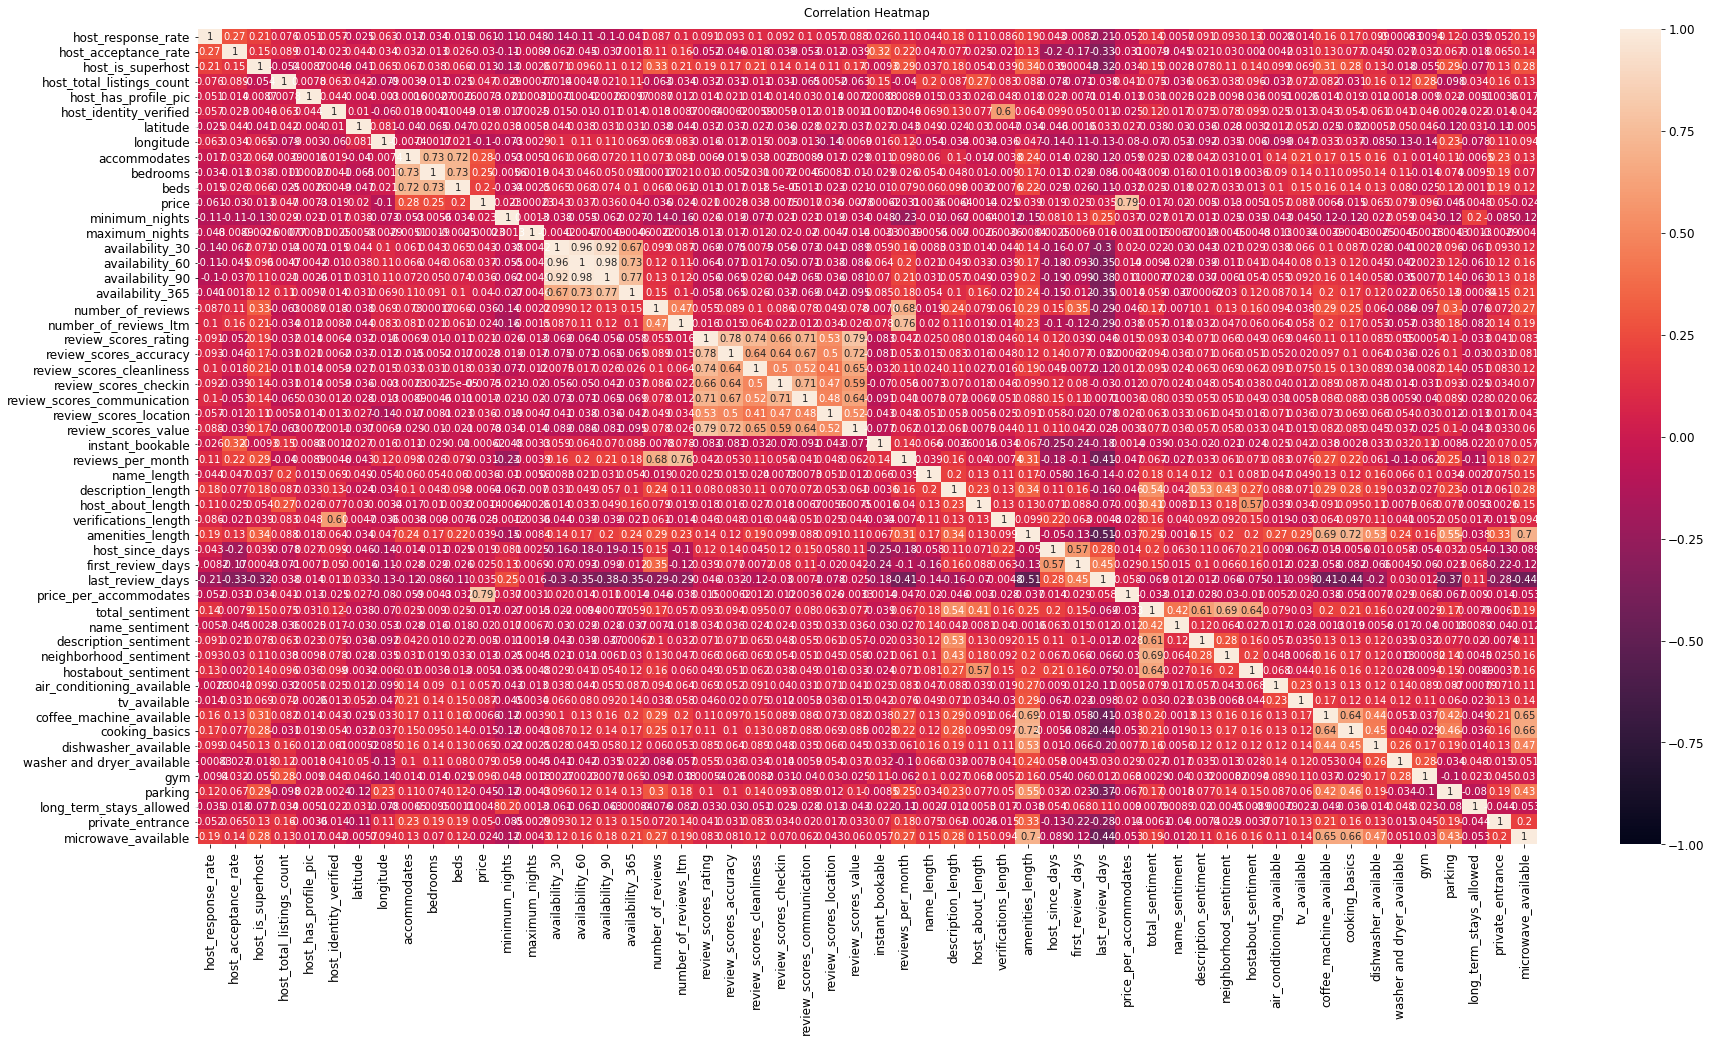

In [47]:
import seaborn as sns
data_corr = df2.corr()
plt.figure(figsize=(30, 15))
heatmap = sns.heatmap(data_corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [48]:
corr_matrix = df2.corr()

mat = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
mat

availability_60       availability_90             0.983451
availability_30       availability_60             0.964108
                      availability_90             0.924654
review_scores_rating  review_scores_value         0.794091
price                 price_per_accommodates      0.792852
                                                    ...   
reviews_per_month     last_review_days           -0.405986
last_review_days      coffee_machine_available   -0.412779
                      cooking_basics             -0.436137
                      microwave_available        -0.437101
amenities_length      last_review_days           -0.514481
Length: 1431, dtype: float64

From the above results, we can see that availability_30, availability_60, and availability_90 are highly correlated to each other. Since New York has recently applied a rule that no rental can be less than 30 days, its better to keep availablity_90 and drop the rest. We will do this in the data pre-processing stage.

In [49]:
corr_matrix=df2.corr()
corr_matrix["price"].sort_values(ascending=False)

price                          1.000000
price_per_accommodates         0.792852
accommodates                   0.276537
bedrooms                       0.251487
beds                           0.201769
gym                            0.095686
tv_available                   0.086851
washer and dryer_available     0.079427
dishwasher_available           0.064528
air_conditioning_available     0.056686
private_entrance               0.049617
host_total_listings_count      0.047327
availability_30                0.042852
availability_365               0.040333
amenities_length               0.038721
availability_60                0.037243
review_scores_location         0.036454
availability_90                0.035982
last_review_days               0.034556
review_scores_cleanliness      0.033119
first_review_days              0.024820
minimum_nights                 0.023094
review_scores_rating           0.021382
latitude                       0.019951
host_since_days                0.019429


None of the newly added variables correlate highly with the price, so this is good!

**Visualization of all predictors**

In [ ]:
sns.set(style="ticks")

sns.pairplot(df2, hue="price", palette="Set1")
plt.show()

**Visualize distribution of numerical variables**

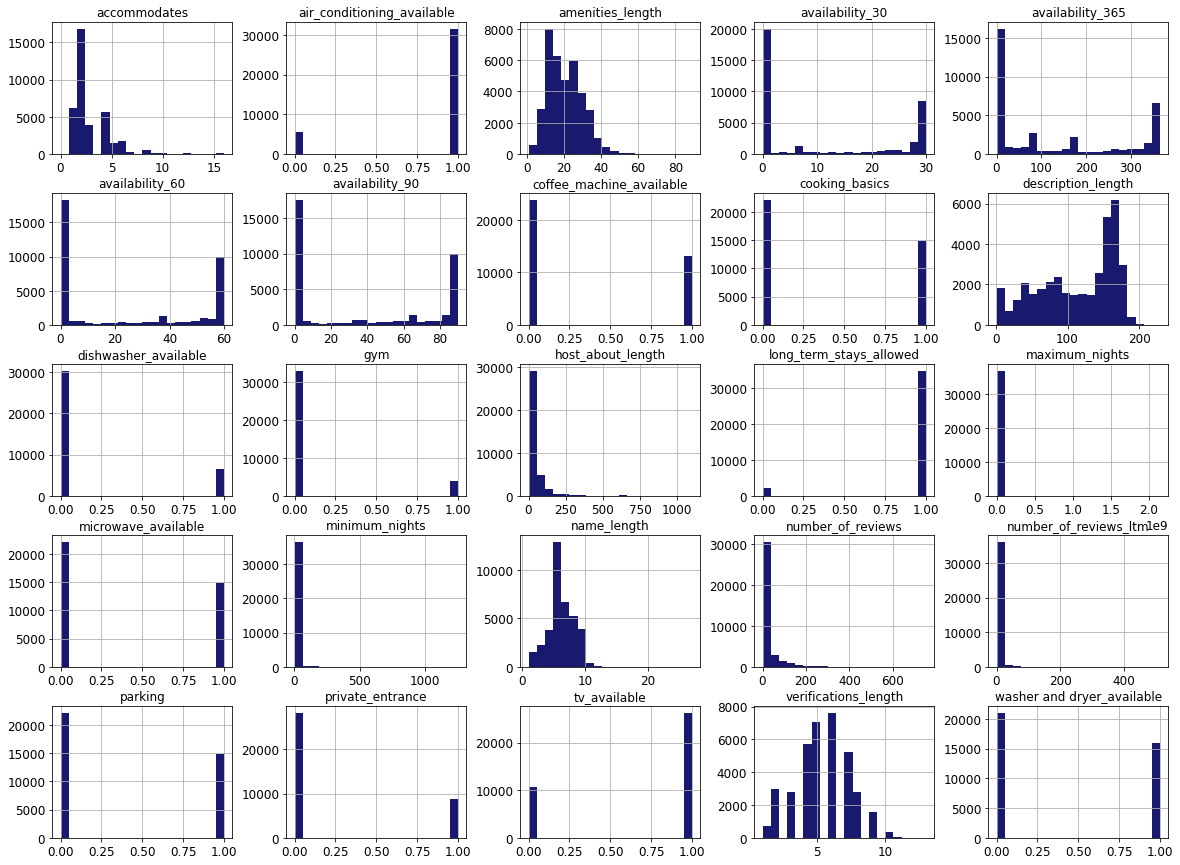

In [50]:
num_vars = df2.select_dtypes('int64', 'float64')

num_vars.hist(bins=20, figsize=(20,15), color='midnightblue')
plt.show();

**Visualize distribution of Categorical Variables**

In [ ]:
cat_vars = df2.select_dtypes('object')

fig, axes = plt.subplots(round(len(cat_vars.columns) / 4), 4, figsize=(20, 15))

for i, ax in enumerate(fig.axes):
    if i < len(cat_vars.columns):
        cat_vars[cat_vars.columns[i]].value_counts().plot.pie(autopct = '%1.1f%%',ax = ax, colormap='tab20b')
        #ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        ax.set_title(cat_vars.columns[i])

fig.tight_layout();

# SHIVANGI TO ADD VISUALIZATIONS HERE!

### Starbucks Effect

Brief Description of starbucks effect: ....

In [57]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [58]:
df_airbnb=pd.read_csv(('http://data.insideairbnb.com/united-states/ny/new-york-city/2021-02-04/data/listings.csv.gz'))

In [434]:
df_airbnb['neighbourhood_group_cleansed'].value_counts()
df1.groupby('neighbourhood_group_cleansed')['price_per_accommodates'].mean()

neighbourhood_group_cleansed
Bronx            33.966254
Brooklyn         43.329440
Manhattan        63.230544
Queens           39.402458
Staten Island    32.186507
Name: price_per_accommodates, dtype: float64

In [435]:
df_places = gpd.read_file('new-york.geojson')
df_places['airbnb_num']=[289,4704,14474,16553,992]
df_places['starbucks_num']=[36,50,50,223,50]
df_places['price_per_acc']=[28.97,32.44,39.97,55.44,31.93]

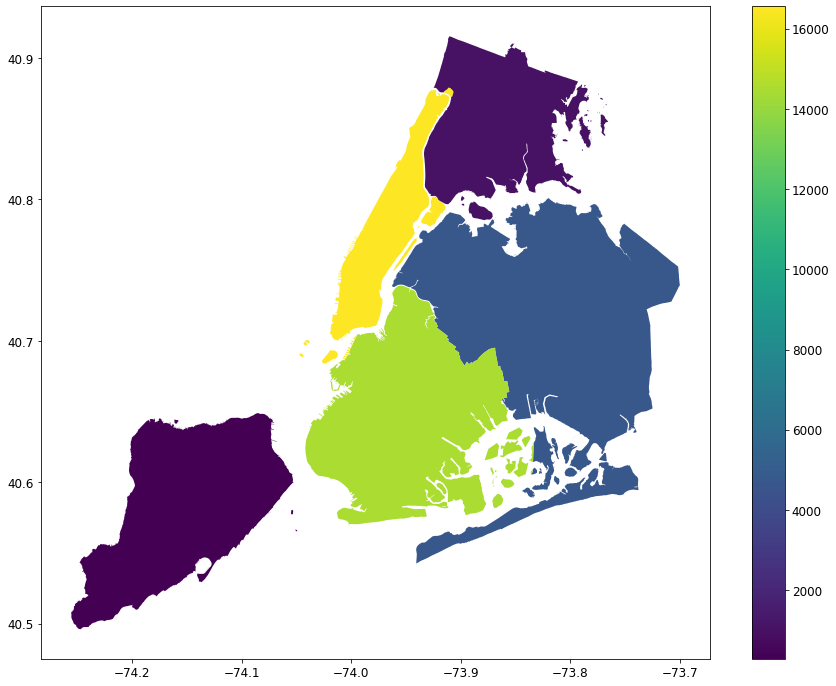

In [436]:
f, ax = plt.subplots(1, figsize=(15, 12))
ax =df_places.plot(column='airbnb_num',ax=ax,legend=True)

plt.show()

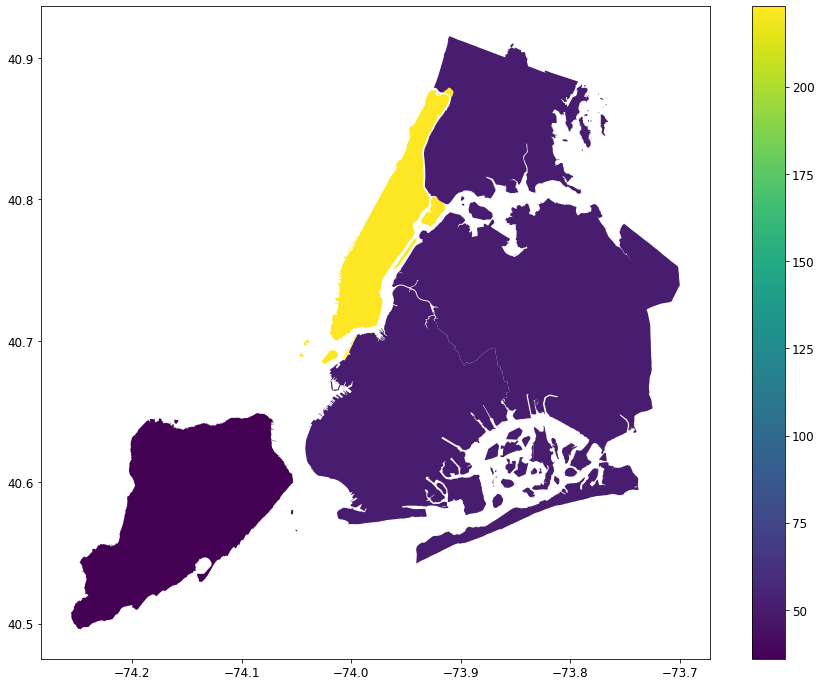

In [437]:
f, ax = plt.subplots(1, figsize=(15, 12))
ax =df_places.plot(column='starbucks_num',ax=ax,legend=True)

plt.show()

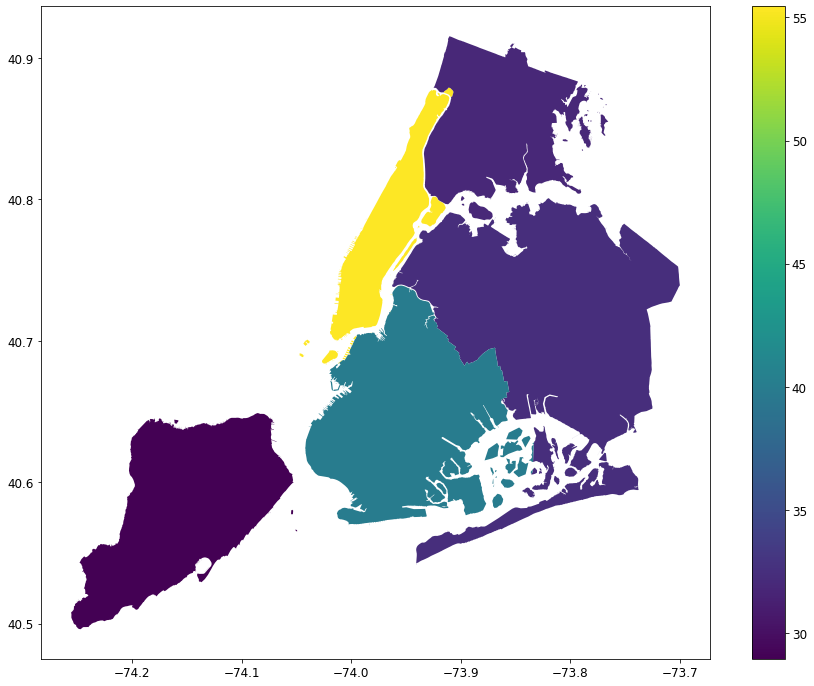

In [438]:
f, ax = plt.subplots(1, figsize=(15, 12))
ax =df_places.plot(column='price_per_acc',ax=ax,legend=True)

plt.show()

- Remove the text attribute because median can only be calculated on numerical attributes:

# 3 - Data Pre-Processing

### Train-Val-Test Split

In [51]:
#Drop variables that are duplicates
df2 = df2.drop(columns = ['host_verifications','neighbourhood_cleansed', 'latitude','longitude', 'bathrooms_text'])

In [52]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [53]:
train_set,valid_set=split_train_test(df2,0.4)
print("The length of train set is: ",len(train_set))
print("The length of valid set is: ",len(valid_set))

The length of train set is:  22208
The length of valid set is:  14804


In [54]:
valid_set,test_set=split_train_test(valid_set,0.4)
print("The length of valid set is: ",len(valid_set))
print("The length of test set is: ",len(test_set))

The length of valid set is:  8883
The length of test set is:  5921


In [55]:
train_set.shape, valid_set.shape, test_set.shape

((22208, 57), (8883, 57), (5921, 57))

### Missing Values

In [56]:
# Missing values statistics
miss_values = missing_values(train_set)
miss_values

Dataframe has 57 columns.
There are 18 columns that have missing values.


Missing Values  % of Total Values
host_response_time                    11102               50.0
host_response_rate                    11102               50.0
host_acceptance_rate                   8794               39.6
review_scores_location                 6131               27.6
review_scores_value                    6130               27.6
review_scores_checkin                  6129               27.6
review_scores_accuracy                 6123               27.6
review_scores_communication            6121               27.6
review_scores_cleanliness              6114               27.5
review_scores_rating                   6109               27.5
reviews_per_month                      5677               25.6
first_review_days                      5677               25.6
last_review_days                       5677               25.6
bedrooms                               2157                9.7
beds                                    302                1.4
host_total_listings_count                 9                0.0
host_since_days                           9                0.0
price_per_accommodates                    9                0.0

**FLAGGING MISSING VALUES**

In [57]:
cols = miss_values.index
df_try = train_set[cols].isnull().astype(int).add_suffix('_indicator')
#df_try

#merge both the df1 and the flagged columns
train_set = pd.merge(train_set, df_try, left_index=True, right_index=True)
train_set.head(10)

host_response_time  host_response_rate  host_acceptance_rate  \
2716   within a few hours               100.0                 100.0   
28556                 NaN                 NaN                   0.0   
21856                 NaN                 NaN                 100.0   
20646      within an hour               100.0                 100.0   
23206        within a day               100.0                  73.0   
8510                  NaN                 NaN                   NaN   
11673                 NaN                 NaN                   NaN   
29433                 NaN                 NaN                 100.0   
21397      within an hour               100.0                  97.0   
34177      within an hour               100.0                 100.0   

       host_is_superhost  host_total_listings_count  host_has_profile_pic  \
2716                   0                        2.0                     1   
28556                  0                        0.0                     1   
21856                  0                        1.0                     1   
20646                  1                        1.0                     1   
23206                  1                        3.0                     1   
8510                   0                        1.0                     1   
11673                  0                        2.0                     1   
29433                  0                        1.0                     1   
21397                  0                        2.0                     1   
34177                  0                     1813.0                     1   

       host_identity_verified neighbourhood_group_cleansed        room_type  \
2716                        1                    Manhattan  Entire home/apt   
28556                       0                     Brooklyn     Private room   
21856                       1                     Brooklyn  Entire home/apt   
20646                       1                     Brooklyn  Entire home/apt   
23206                       0                     Brooklyn     Private room   
8510                        1                    Manhattan  Entire home/apt   
11673                       1                    Manhattan     Private room   
29433                       1                     Brooklyn  Entire home/apt   
21397                       0                       Queens  Entire home/apt   
34177                       1                    Manhattan  Entire home/apt   

       accommodates  ...  review_scores_cleanliness_indicator  \
2716              2  ...                                    0   
28556             1  ...                                    0   
21856             2  ...                                    0   
20646             2  ...                                    0   
23206             2  ...                                    0   
8510              5  ...                                    1   
11673             2  ...                                    0   
29433             6  ...                                    0   
21397             2  ...                                    0   
34177             5  ...                                    1   

       review_scores_rating_indicator  reviews_per_month_indicator  \
2716                                0                            0   
28556                               0                            0   
21856                               0                            0   
20646                               0                            0   
23206                               0                            0   
8510                                1                            0   
11673                               0                            0   
29433                               0                            0   
21397                               0                            0   
34177                               1                            1   

       first_review_

**ITERATIVE IMPUTER** For numerical variables

In [58]:
train_set.columns

Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'room_type', 'accommodates', 'bedrooms',
       'beds', 'price', 'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'reviews_per_month', 'name_length', 'description_length',
       'host_about_length', 'verifications_length', 'amenities_length',
       'host_since_days', 'first_review_days', 'last_review_days',
       'price_per_accommodates', 'num_bath', 'name_bath', 'total_sentiment',
       'name_sentiment', 'de

In [59]:
#choose numerical variables only
df_num = train_set.drop(columns=['host_response_time', 'neighbourhood_group_cleansed','name_bath', 'room_type'])
#df_num=df3[['host_response_rate', 'host_acceptance_rate','review_scores_value', 'review_scores_location',
#                     'review_scores_checkin','review_scores_accuracy','review_scores_communication',
#                     'review_scores_cleanliness','review_scores_rating','reviews_per_month','first_review_days',
#                     'last_review_days','bedrooms','beds','host_total_listings_count','host_since_days']]

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(random_state=0)

df_num1 = imp.fit_transform(df_num)

cols = list(df_num)

df_num1=pd.DataFrame(df_num1)
df_num1.columns=cols

# Re-check Missing values statistics
miss_values = missing_values(df_num1)
miss_values.head(20)

Dataframe has 71 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

**Now, replace the incomplete columns in train_set with the corresponding imputed columns from df_num1**

In [60]:
train_set[cols] = df_num1[cols].values

train_set.head(5)

host_response_time  host_response_rate  host_acceptance_rate  \
2716   within a few hours          100.000000                 100.0   
28556                 NaN           63.543114                   0.0   
21856                 NaN           91.927515                 100.0   
20646      within an hour          100.000000                 100.0   
23206        within a day          100.000000                  73.0   

       host_is_superhost  host_total_listings_count  host_has_profile_pic  \
2716                 0.0                        2.0                   1.0   
28556                0.0                        0.0                   1.0   
21856                0.0                        1.0                   1.0   
20646                1.0                        1.0                   1.0   
23206                1.0                        3.0                   1.0   

       host_identity_verified neighbourhood_group_cleansed        room_type  \
2716                      1.0                    Manhattan  Entire home/apt   
28556                     0.0                     Brooklyn     Private room   
21856                     1.0                     Brooklyn  Entire home/apt   
20646                     1.0                     Brooklyn  Entire home/apt   
23206                     0.0                     Brooklyn     Private room   

       accommodates  ...  review_scores_cleanliness_indicator  \
2716            2.0  ...                                  0.0   
28556           1.0  ...                                  0.0   
21856           2.0  ...                                  0.0   
20646           2.0  ...                                  0.0   
23206           2.0  ...                                  0.0   

       review_scores_rating_indicator  reviews_per_month_indicator  \
2716                              0.0                          0.0   
28556                             0.0                          0.0   
21856                             0.0                          0.0   
20646                             0.0                          0.0   
23206                             0.0                          0.0   

       first_review_days_indicator  last_review_days_indicator  \
2716                           0.0                         0.0   
28556                          0.0                         0.0   
21856                          0.0                         0.0   
20646                          0.0                         0.0   
23206                          0.0                         0.0   

       bedrooms_indicator  beds_indicator  \
2716                  0.0             0.0   
28556                 0.0             0.0   
21856                 1.0             0.0   
20646                 0.0             0.0   
23206                 0.0             0.0   

       host_total_listings_count_indicator  host_since_days_indicator  \
2716                                   0.0                        0.0   
28556                                  0.0                        0.0   
21856                                  0.0                        0.0   
20646                                  0.0                        0.0   
23206                                  0.0                        0.0   

       price_per_accommodates_indicator  
2716                                0.0  
28556                               0.0  
21856                               0.0  
20646                               0.0  
23206                               0.0  

[5 rows x 75 columns]

In [61]:
# Re-check Missing values statistics
miss_values = missing_values(train_set)
miss_values.head(20)

Dataframe has 75 columns.
There are 1 columns that have missing values.


Missing Values  % of Total Values
host_response_time           11102               50.0

**We have taken care of the numerical values, and need to work on the categorical values next...**

In [62]:
train_set['host_response_time'].mode()

0    within an hour
dtype: object

In [63]:
train_set['host_response_time'] = train_set['host_response_time'].fillna("within an hour")

In [64]:
# Check Missing values statistics again
miss_values = missing_values(train_set)
miss_values.head(20)

Dataframe has 75 columns.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Missing Values, % of Total Values]
Index: []

### Categorical Encoding

In [65]:
train_set = pd.get_dummies(train_set, columns=['host_response_time','neighbourhood_group_cleansed','name_bath', 'room_type'])

In [66]:
train_set.head(5)

host_response_rate  host_acceptance_rate  host_is_superhost  \
2716           100.000000                 100.0                0.0   
28556           63.543114                   0.0                0.0   
21856           91.927515                 100.0                0.0   
20646          100.000000                 100.0                1.0   
23206          100.000000                  73.0                1.0   

       host_total_listings_count  host_has_profile_pic  \
2716                         2.0                   1.0   
28556                        0.0                   1.0   
21856                        1.0                   1.0   
20646                        1.0                   1.0   
23206                        3.0                   1.0   

       host_identity_verified  accommodates  bedrooms  beds  price  ...  \
2716                      1.0           2.0  2.000000   2.0  198.0  ...   
28556                     0.0           1.0  1.000000   1.0   50.0  ...   
21856                     1.0           2.0  1.070207   1.0  160.0  ...   
20646                     1.0           2.0  1.000000   1.0  190.0  ...   
23206                     0.0           2.0  1.000000   1.0   50.0  ...   

       neighbourhood_group_cleansed_Staten Island  name_bath_   \
2716                                            0            0   
28556                                           0            0   
21856                                           0            0   
20646                                           0            0   
23206                                           0            0   

       name_bath_half-bath  name_bath_nan  name_bath_private bath  \
2716                     0              0                       1   
28556                    0              0                       0   
21856                    0              0                       1   
20646                    0              0                       1   
23206                    0              0                       0   

       name_bath_shared bath  room_type_Entire home/apt  room_type_Hotel room  \
2716                       0                          1                     0   
28556                      1                          0                     0   
21856                      0                          1                     0   
20646                      0                          1                     0   
23206                      1                          0                     0   

       room_type_Private room  room_type_Shared room  
2716                        0                      0  
28556                       1                      0  
21856                       0                      0  
20646                       0                      0  
23206                       1                      0  

[5 rows x 89 columns]

**Correlations**

In [67]:
corr_matrix = train_set.corr()

mat = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
mat

first_review_days_indicator            last_review_days_indicator                1.000000
reviews_per_month_indicator            first_review_days_indicator               1.000000
host_response_time_indicator           host_response_rate_indicator              1.000000
host_total_listings_count_indicator    host_since_days_indicator                 1.000000
reviews_per_month_indicator            last_review_days_indicator                1.000000
                                                                                   ...   
neighbourhood_group_cleansed_Brooklyn  neighbourhood_group_cleansed_Manhattan   -0.722790
host_acceptance_rate                   maximum_nights                           -0.942521
room_type_Entire home/apt              room_type_Private room                   -0.947868
name_bath_private bath                 name_bath_shared bath                    -0.988646
host_response_rate                     maximum_nights                           -0.994775
Length: 39

**SO MANY CORRELATED VARIABLES - need to be taken out!**

### Outlier Treatment

In [68]:
from sklearn.ensemble import IsolationForest

iforest = IsolationForest(n_estimators=100, random_state=42, contamination=0.02)
pred = iforest.fit_predict(train_set)
score = iforest.decision_function(train_set)

from numpy import where
anom_index = where(pred== -1)
values = train_set.iloc[anom_index]
values

host_response_rate  host_acceptance_rate  host_is_superhost  \
35260          100.000000             84.000000                0.0   
27564          100.000000            100.000000                0.0   
24028           40.000000             97.000000                0.0   
28503           52.387019            100.000000                0.0   
14914            0.000000             28.016088                0.0   
...                   ...                   ...                ...   
32203            0.000000            100.000000                0.0   
29334           94.000000             88.000000                0.0   
34607           53.876800             67.245027                0.0   
30931           93.000000             92.000000                0.0   
31589           96.000000             68.000000                0.0   

       host_total_listings_count  host_has_profile_pic  \
35260                     1515.0                   1.0   
27564                        7.0                   1.0   
24028                        7.0                   1.0   
28503                        1.0                   1.0   
14914                        1.0                   1.0   
...                          ...                   ...   
32203                        4.0                   1.0   
29334                        4.0                   1.0   
34607                        3.0                   1.0   
30931                        1.0                   1.0   
31589                      424.0                   1.0   

       host_identity_verified  accommodates  bedrooms     beds   price  ...  \
35260                     1.0           1.0  0.720996  1.00000   166.0  ...   
27564                     1.0           3.0  1.000000  3.00000    30.0  ...   
24028                     0.0           2.0  1.000000  1.00000   309.0  ...   
28503                     1.0           2.0  1.000000  0.00000   100.0  ...   
14914                     1.0           8.0  4.000000  4.00000   300.0  ...   
...                       ...           ...       ...      ...     ...  ...   
32203                     1.0           2.0  1.000000  2.00000    27.0  ...   
29334                     0.0           2.0  1.000000  1.00000    40.0  ...   
34607                     0.0           8.0  1.000000  2.60422  1000.0  ...   
30931                     1.0           2.0  1.000000  1.00000    69.0  ...   
31589                     1.0           7.0  4.000000  5.00000   683.0  ...   

       neighbourhood_group_cleansed_Staten Island  name_bath_   \
35260                                           0            0   
27564                                           0            0   
24028                                           0            0   
28503                                           0            0   
14914                                           0            0   
...                                           ...          ...   
32203                                           0            0   
29334                                           0            0   
34607                                           0            0   
30931                                           0            0   
31589                                           0            0   

       name_bath_half-bath  name_bath_nan  name_bath_private bath  \
35260                    0              0                       1   
27564                    0              0                       0   
24028                    0              0                       1   
28503                    0              0                       0   
14914                    0              0                       1   
...                    ...            ...                     ...   
32203                    0              0                       0   
29334                    0              0                       0   
34607                    0              0                       0   
30931                    0           

**NOTE: Out of 22208 observations, there are 445 outliers. We will remove the outliers.**

In [69]:
train_set = train_set[~train_set.index.isin(values.index)]
train_set.shape

(21763, 89)

**Separate Predictors and Target Variable**

In [70]:
y_train = train_set['price']
X_train = train_set.drop(columns=['price'])

### Feature Selection

In [71]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(random_state=0)

model = randomforest.fit(X_train,y_train)

model.feature_importances_

pd.DataFrame(list(zip(X_train.columns,model.feature_importances_)), columns = ['predictor','feature importance']).sort_values("feature importance")

array([2.45268569e-02, 2.65193828e-02, 4.55825090e-03, 1.76827460e-02,
       3.30329022e-04, 5.81692543e-03, 2.07978547e-02, 1.05220459e-02,
       1.16544581e-02, 1.29207491e-02, 1.70876541e-02, 1.25492184e-02,
       1.38402019e-02, 1.47188466e-02, 1.84343443e-02, 2.28749025e-02,
       1.18591678e-02, 2.48878102e-02, 1.48090515e-02, 1.84050291e-02,
       1.40352654e-02, 1.37610480e-02, 1.59140031e-02, 1.71600259e-02,
       6.83604688e-03, 3.22045116e-02, 2.42348748e-02, 3.28895925e-02,
       2.21642366e-02, 2.21807180e-02, 2.96545093e-02, 3.35082193e-02,
       3.34484435e-02, 3.28235285e-02, 9.13517687e-02, 7.48987024e-03,
       3.31384696e-02, 2.13199325e-02, 3.31549261e-02, 2.41611654e-02,
       1.95413569e-02, 4.72652742e-03, 6.38501817e-03, 5.53417141e-03,
       5.52768331e-03, 4.38718301e-03, 7.77983562e-03, 4.02301611e-03,
       6.26082032e-03, 2.48048796e-03, 5.54614840e-03, 5.58753587e-03,
       2.99162807e-03, 2.94987741e-03, 3.53245326e-03, 1.85321344e-03,
      

predictor  feature importance
69     price_per_accommodates_indicator            0.000024
68            host_since_days_indicator            0.000030
67  host_total_listings_count_indicator            0.000044
80                  name_bath_half-bath            0.000088
79                          name_bath_             0.000094
..                                  ...                 ...
36                      total_sentiment            0.033138
38                description_sentiment            0.033155
32                    first_review_days            0.033448
31                      host_since_days            0.033508
34               price_per_accommodates            0.091352

[88 rows x 2 columns]

### Standardize Data

In [73]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

### Pre-Process Validation Set

In [74]:
#Flag Missing Values
miss_values = missing_values(valid_set)
cols = miss_values.index
df_try = valid_set[cols].isnull().astype(int).add_suffix('_indicator')

#merge both the df1 and the flagged columns
valid_set = pd.merge(valid_set, df_try, left_index=True, right_index=True)

#Iterative Imputer
df_num = valid_set.drop(columns=['host_response_time', 'neighbourhood_group_cleansed','name_bath', 'room_type'])
imp = IterativeImputer(random_state=0)
df_num1 = imp.fit_transform(df_num)
cols = list(df_num)
df_num1=pd.DataFrame(df_num1)
df_num1.columns=cols
valid_set[cols] = df_num1[cols].values

#categorical encoding
valid_set['host_response_time'] = valid_set['host_response_time'].fillna("within an hour")
valid_set = pd.get_dummies(valid_set, columns=['host_response_time','neighbourhood_group_cleansed','name_bath', 'room_type'])

#drop correlated variables
#val = val.drop(['Complain_0','Gender_Male','CityTier_3', 'PreferredLoginDevice_Computer'], axis=1)

#Separate Features and Target
y_valid = valid_set['price']
X_valid = valid_set.drop(columns=['price'])

#drop most useless variables from feature selection
#X_val = X_val.drop(['PreferedOrderCat_Others','PreferedOrderCat_Grocery','CityTier_2','MaritalStatus_Divorced','PreferredPaymentMode_UPI','PreferedOrderCat_Fashion'], axis=1)

#standardize the data
sc = StandardScaler()
X_valid_std = sc.fit_transform(X_valid)

Dataframe has 57 columns.
There are 18 columns that have missing values.


In [75]:
X_valid_std.shape, y_valid.shape, X_train.shape, y_train.shape

((8883, 88), (8883,), (21763, 88), (21763,))

# 4 - Machine Learning

## A) Unsupervised Learning

### PCA

StandardScaler()

PCA(n_components=2)

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, 'First principal component')

Text(0, 0.5, 'Second Principal Component')

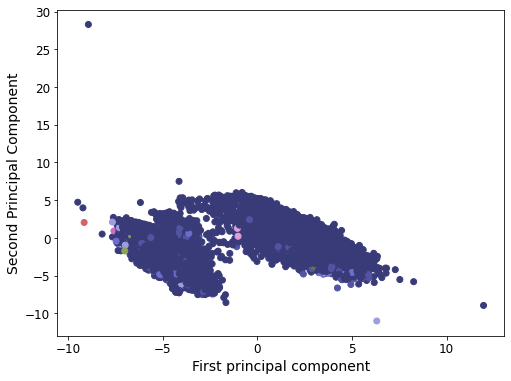

In [76]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaler.fit(train_set)
scaled_data = scaler.transform(train_set)
pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=train_set['price'],cmap='tab20b')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

<Figure size 864x432 with 0 Axes>

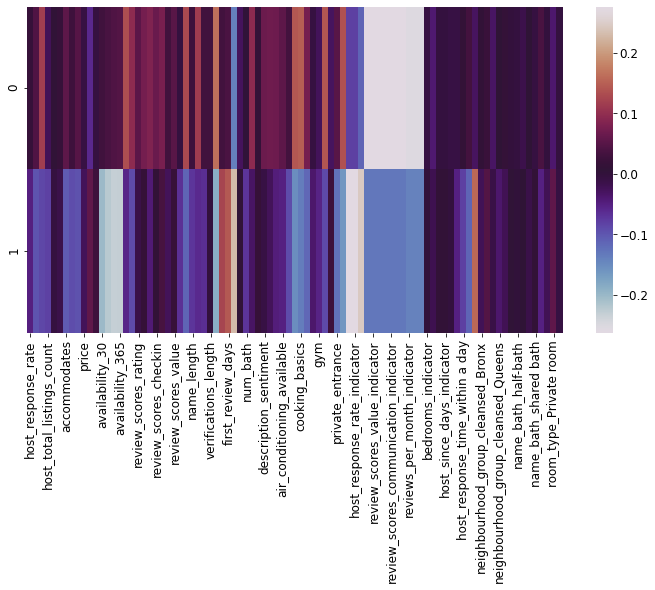

In [77]:
map= pd.DataFrame(pca.components_,columns=train_set.columns)
plt.figure(figsize=(12,6))
sns.heatmap(map,cmap='twilight')

## B) Semi-Supervised Learning

Add Fandi's code here

## Semi-Supervised Model

In [792]:
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.semi_supervised import LabelSpreading

### To mask data to labeled and unlabeled

In [793]:
import numpy as np
import random

In [105]:
from sklearn.metrics import mean_squared_error
from numpy import concatenate
def runLP(x,target,x_test,target_test,n):
        

    data = x
    labels = target

    X_train_lab, X_test_unlab, y_train_lab, y_test_unlab = train_test_split(data, labels, test_size=n, random_state=123)
    #RUN THE MODEL
    X_train_mixed = concatenate((X_train_lab, X_test_unlab))
    # create "no label" for unlabeled data
    nolabel = [-1 for _ in range(len(y_test_unlab))]
    # recombine training dataset labels
    y_train_mixed = concatenate((y_train_lab, nolabel))
    print(y_train_mixed)
    model = LabelSpreading(max_iter=100)
    model.fit(X_train_mixed, y_train_mixed)
    pred = np.array(model.predict(x_test))
    #SEPARATE PREDICTED SAMPLES
    print(model.predict(x).sum())

    
    #PRINT CONFUSION MATRIX
    return model, mean_squared_error(target_test, pred),target_test,pred

In [106]:
train_set.columns

Index(['last_scraped', 'name', 'description', 'host_name', 'host_since',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_verifications',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms_text',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'instant_bookable', 'reviews_per_month', 'last_scarped', 'name_length',
       'description_length', 'host_about_length', 'verifications_length',
       'amenities_length', 'host_since_days', 'first_reviews_days',
       'last_review_days', 'price_per_accommodates', 'num_bath', 'name_bath',
       'air_conditioning_available', 'bbq_available', 'pat

In [107]:
train_set.describe().columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_identity_verified', 'latitude',
       'longitude', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'number_of_reviews_l30d', 'review_scores_rating', 'instant_bookable',
       'reviews_per_month', 'name_length', 'description_length',
       'host_about_length', 'verifications_length', 'amenities_length',
       'host_since_days', 'first_reviews_days', 'last_review_days',
       'price_per_accommodates', 'air_conditioning_available', 'bbq_available',
       'patio', 'beach', 'breakfast_available', 'tv_available',
       'coffee_machine_available', 'cooking_basics', 'dishwasher_available',
       'washer and dryer_available', 'gym', 'parking',
       'long_term_stays_allowed', 'private_entrance', 'microwave_available',
       'Bedford-Stuyvesant', 'Williamsburg', 'Harlem', 'Bushwick',
       'Upper West Si

In [108]:
target=train_set['price']
x=train_set[train_set.describe().columns].drop(['price'],axis=1)
x=x.to_numpy()
target_test=test_set['price']
x_test=test_set[test_set.describe().columns].drop(['price'],axis=1)
x_test=x_test.to_numpy()

In [109]:
target_test.to_numpy()

array([102., 100., 161., ...,  60.,  75.,  86.])

In [110]:
model, matrix,labels,pred=runLP(x,target,x_test,target_test,0.5)

[215. 113. 176. ...  -1.  -1.  -1.]
524536.0


In [111]:
pd.DataFrame(model.predict(x)).describe()

0
count  7128.000000
mean     73.588103
std     148.862375
min      10.000000
25%      10.000000
50%      10.000000
75%      97.000000
max    4500.000000

In [112]:
pd.DataFrame(labels).describe()

price
count  1783.000000
mean    132.240606
std     181.644294
min      18.000000
25%      59.500000
50%      95.000000
75%     150.000000
max    4000.000000

In [113]:
pd.DataFrame(pred).describe()

0
count  1783.000000
mean     10.355020
std      14.990911
min      10.000000
25%      10.000000
50%      10.000000
75%      10.000000
max     643.000000

** INSIGHTS: **

## C) Supervised Learning

Add AutoML here or in another file

In [114]:
import h2o
from h2o.automl import H2OAutoML
# initialize the h2o session
h2o.init()
# load an h2o DataFrame from pandas DataFrame.



Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ---------------------------------------------------------
H2O_cluster_uptime:         1 hour 28 mins
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.32.1.1
H2O_cluster_version_age:    17 days
H2O_cluster_name:           H2O_from_python_fandi_6ydgt5
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.491 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
H2O_API_Extensions:         Amazon S3, Algos, AutoML, Core V3, TargetEncoder, Core V4
Python_version:             3.7.4 final
--------------------------  ---------------------------------------------------------

In [124]:
train_set.head()

last_scraped                                               name  \
17089   2021-02-05              Artistic Studio Apt, Private Entrance   
4154    2021-02-06  TOWNHOUSE NEAR RSD PARK - 1 Bedroom Apt & Terrace   
1894    2021-02-05                  Nice Bedroom in Central Bushwick!   
19604   2021-02-05          Private Room in Midtown at Royalton Hotel   
3953    2021-02-05  Gorgeous Private Suite w/ Roof Access in Manha...   

                                             description host_name host_since  \
17089  Street level, private entrance to studio in a ...     Tohar 2018-10-21   
4154   Beautiful 1BR apartment with high ceilings & s...   Juliana 2014-12-26   
1894   This is a nice master bedroom in a classic 2 b...     David 2012-06-18   
19604  This standard room at the Royalton New York of...  Royalton 2019-05-13   
3953   Private suite in renovated pre-war apartment. ...  Adrienne 2013-07-21   

                                              host_about  host_response_time  \
17089  As a long time Brooklynite, I can easily give ...        within a day   
4154                        motivated & service oriented  within a few hours   
1894   I'm originally from Phoenix, Arizona.  I went ...      within an hour   
19604  Royalton New York has interiors designed by Ro...  within a few hours   
3953   Hi, I'm Adrienne!\r\nI have lived in NYC for 3...  within a few hours   

       host_response_rate  host_acceptance_rate  host_is_superhost  ...  \
17089               100.0                  67.0                1.0  ...   
4154                100.0                 100.0                1.0  ...   
1894                100.0                  33.0                0.0  ...   
19604                94.0                  97.0                0.0  ...   
3953                100.0                  71.0                1.0  ...   

       neigbourhood_top_10 flag  host_response_time_indicator  \
17089                  1.0  1.0                           0.0   
4154                   1.0  1.0                           0.0   
1894                   1.0  1.0                           0.0   
19604                  0.0  1.0                           0.0   
3953                   0.0  1.0                           0.0   

      host_response_rate_indicator host_acceptance_rate_indicator  \
17089                          0.0                            0.0   
4154                           0.0                            0.0   
1894                           0.0                            0.0   
19604                          0.0                            0.0   
3953                           0.0                            0.0   

       bedrooms_indicator  description_indicator beds_indicator  \
17089                 0.0                    0.0            0.0   
4154                  0.0                    0.0            0.0   
1894                  0.0                    0.0            0.0   
19604                 0.0                    0.0            0.0   
3953                  0.0                    0.0            0.0   

      bathrooms_text_indicator  name_indicator  
17089                      0.0             0.0  
4154                       0.0             0.0  
1894                       0.0             0.0  
19604                      0.0             0.0  
3953                       0.0             0.0  

[5 rows x 81 columns]

In [125]:
train_set=train_set.drop(train_set.iloc[:, 75:82], axis=1)
test_set=test_set.drop(test_set.iloc[:, 75:82], axis=1)
train_set=train_set[list(train_set.describe().columns)]
test_set=test_set[list(test_set.describe().columns)]

In [126]:
train_set.to_csv('automl_train.csv')

In [127]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7128 entries, 17089 to 22438
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_response_rate            7128 non-null   float64
 1   host_acceptance_rate          7128 non-null   float64
 2   host_is_superhost             7128 non-null   float64
 3   host_total_listings_count     7128 non-null   float64
 4   host_identity_verified        7128 non-null   float64
 5   latitude                      7128 non-null   float64
 6   longitude                     7128 non-null   float64
 7   accommodates                  7128 non-null   float64
 8   bedrooms                      7128 non-null   float64
 9   beds                          7128 non-null   float64
 10  price                         7128 non-null   float64
 11  minimum_nights                7128 non-null   float64
 12  maximum_nights                7128 non-null   float64
 13

In [128]:
train_set.describe().columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_total_listings_count', 'host_identity_verified', 'latitude',
       'longitude', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'number_of_reviews_l30d', 'review_scores_rating', 'instant_bookable',
       'reviews_per_month', 'name_length', 'description_length',
       'host_about_length', 'verifications_length', 'amenities_length',
       'host_since_days', 'first_reviews_days', 'last_review_days',
       'price_per_accommodates', 'air_conditioning_available', 'bbq_available',
       'patio', 'beach', 'breakfast_available', 'tv_available',
       'coffee_machine_available', 'cooking_basics', 'dishwasher_available',
       'washer and dryer_available', 'gym', 'parking',
       'long_term_stays_allowed', 'private_entrance', 'microwave_available',
       'Bedford-Stuyvesant', 'Williamsburg', 'Harlem', 'Bushwick',
       'Upper West Si

In [134]:
df_test = h2o.import_file('automl_train.csv')

x = list(train_set.describe().columns)
x.remove('price')
x.remove('price_per_accommodates')# remove the target
aml = H2OAutoML(max_models=10, seed=1)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [135]:
df_test

C1 host_response_rate host_acceptance_rate host_is_superhost host_total_listings_count host_identity_verified latitude longitude accommodates bedrooms beds price minimum_nights maximum_nights number_of_reviews number_of_reviews_l30d review_scores_rating instant_bookable reviews_per_month name_length description_length host_about_length verifications_length amenities_length host_since_days first_reviews_days last_review_days price_per_accommodates air_conditioning_available bbq_available patio beach breakfast_available tv_available coffee_machine_available cooking_basics dishwasher_available washer and dryer_available gym parking long_term_stays_allowed private_entrance microwave_available Bedford-Stuyvesant Williamsburg Harlem Bushwick Upper West Side East Village Hell's Kitchen Upper East Side Midtown Crown Heights neigbourhood_top_10 flag host_response_time_indicator host_response_rate_indicator 
 
 
 17089 100 67 1 2 1 40.6701 -73.9415 2 1 2 143 2 12 33 0 96 0 1.19 5 88 42 5 21 838 830 438 71.5 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 
 4154 100 100 1 34 1 40.7823 -73.9841 3 1 1 155 30 1125 12 0 95 1 0.17 10 168 4 7 32 2234 2079 548 51.6667 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 
 1894 100 33 0 1 1 40.7034 -73.9134 2 1 1 56 2 1125 39 0 94 0 0.44 5 163 71 6 23 3154 2642 311 28 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 
 19604 94 97 0 9 1 40.7555 -73.9846 2 1 1 149 1 1125 106 6 83 1 5.15 7 82 50 2 24 634 616 19 74.5 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 
 3953 100 71 1 1 1 40.8504 -73.9393 1 1 1 45 30 45 9 0 97 1 0.15 8 99 32 8 12 2756 1858 799 45 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 
 1213 20 39 0 2 1 40.6871 -73.9657 4 1 2 170 3 1125 366 0 96 0 3.76 3 159 102 4 28 2960 2919 160 42.5 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 
 8813 100 93 0 2 1 40.6798 -73.9062 2 1 2 92 1 60 248 0 89 0 4.92 6 131 25 5 19 1694 1511 191 46 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 
 24706 100 98 1 0 1 40.769 -73.9647 2 1 1 151 5 1125 14 0 99 0 1.71 7 81 18 6 34 548 244 31 75.5 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 
 14683 90 73.2319 0 1 1 40.7223 -73.9865 7 4 4 1701 5 365 63 0 91 0 1.8 2 152 7 7 28 2391 1048 522 243 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 2717 100 90 0 1 1 40.7518 -73.9969 2 1 1 69 30 365 190 0 93 0 2.44 4 176 72 7 29 3948 2335 61 34.5 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0

In [137]:
pred=aml.train(x=x, y='price', training_frame=df_test)
lb = aml.leaderboard # Leader board
print(lb.head(rows=lb.nrows)) # print leader board

AutoML progress: |█
21:15:28.648: AutoML: XGBoost is not available; skipping it.
21:16:53.85: New models will be added to existing leaderboard AutoML_20210411_211528547@@price (leaderboard frame=null) with already 6 models.
21:16:53.100: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████| 100%

21:18:34.710: StackedEnsemble_BestOfFamily_AutoML_20210411_211653 [StackedEnsemble best (built using top model from each algorithm type)] failed: water.exceptions.H2OIllegalArgumentException: Failed to find the xval predictions frame. . .  Looks like keep_cross_validation_predictions wasn't set when building the models, or the frame was deleted.
21:18:35.713: StackedEnsemble_AllModels_AutoML_20210411_211653 [StackedEnsemble all (built using all AutoML models)] failed: water.exceptions.H2OIllegalArgumentException: Failed to find the xval predictions frame. . .  Looks like keep_cross_validation_predictions wasn't set when building the models, or

model_id mean_residual_deviance rmse mse mae rmsle 
 
 
 GBM_2_AutoML_20210411_211528 15923.8 126.19 15923.8 53.2565 nan 
 GBM_2_AutoML_20210411_211653 15923.8 126.19 15923.8 53.2565 nan 
 DRF_1_AutoML_20210411_211653 16050.4 126.69 16050.4 52.2755 0.445243 
 DRF_1_AutoML_20210411_211528 16050.4 126.69 16050.4 52.2755 0.445243 
 GBM_4_AutoML_20210411_211528 16090.9 126.85 16090.9 52.7316 nan 
 GBM_4_AutoML_20210411_211653 16090.9 126.85 16090.9 52.7316 nan 
 GBM_3_AutoML_20210411_211653 16193.1 127.252 16193.1 53.2394 nan 
 GBM_3_AutoML_20210411_211528 16193.1 127.252 16193.1 53.2394 nan 
 GBM_1_AutoML_20210411_211653 16282.9 127.604 16282.9 52.2298 0.451426 
 GBM_1_AutoML_20210411_211528 16282.9 127.604 16282.9 52.2298 0.451426 
 GBM_grid__1_AutoML_20210411_211653_model_1 16476.2 128.36 16476.2 53.6998 nan 
 XRT_1_AutoML_20210411_211653 16736.5 129.37 16736.5 56.3483 0.47238 
 GBM_5_AutoML_20210411_211653 17898.6 133.786 17898.6 55.2388 nan 
 DeepLearning_1_AutoML_20210411_211653 19336 139.054 19336 61.7107 nan 
 GLM_1_AutoML_20210411_211528 21271.3 145.847 21271.3 65.8348 nan 
 GLM_1_AutoML_20210411_211653 21271.3 145.847 21271.3 65.8348 nan

In [138]:
test_set.to_csv('for_automl_test.csv')

In [139]:
test = h2o.import_file('for_automl_test.csv')
preds = aml.predict(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%


In [140]:
preds

predict 
 
 
 119.558 
 74.9731 
 128.949 
 73.155 
 17.5905 
 206.53 
 39.9033 
 215.354 
 107.484 
 146.409

In [141]:
list_model=h2o.as_list(lb.head(rows=lb.nrows)['model_id'], use_pandas=False)

In [142]:
import itertools

list_m = list(itertools.chain(*list_model))

In [143]:
list_m

['model_id',
 'GBM_2_AutoML_20210411_211528',
 'GBM_2_AutoML_20210411_211653',
 'DRF_1_AutoML_20210411_211653',
 'DRF_1_AutoML_20210411_211528',
 'GBM_4_AutoML_20210411_211528',
 'GBM_4_AutoML_20210411_211653',
 'GBM_3_AutoML_20210411_211653',
 'GBM_3_AutoML_20210411_211528',
 'GBM_1_AutoML_20210411_211653',
 'GBM_1_AutoML_20210411_211528',
 'GBM_grid__1_AutoML_20210411_211653_model_1',
 'XRT_1_AutoML_20210411_211653',
 'GBM_5_AutoML_20210411_211653',
 'DeepLearning_1_AutoML_20210411_211653',
 'GLM_1_AutoML_20210411_211528',
 'GLM_1_AutoML_20210411_211653']

**Model Explainability**

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id mean_residual_deviance rmse mse mae rmsle training_time_ms predict_time_per_row_ms algo 
 
 
 GBM_2_AutoML_20210411_211528 15923.8 126.19 15923.8 53.2565 nan 1604 0.006615 GBM 
 GBM_2_AutoML_20210411_211653 15923.8 126.19 15923.8 53.2565 nan 1286 0.003472 GBM 
 DRF_1_AutoML_20210411_211653 16050.4 126.69 16050.4 52.2755 0.445243 6048 0.004321 DRF 
 DRF_1_AutoML_20210411_211528 16050.4 126.69 16050.4 52.2755 0.445243 8882 0.004689 DRF 
 GBM_4_AutoML_20210411_211528 16090.9 126.85 16090.9 52.7316 nan 1673 0.004461 GBM 
 GBM_4_AutoML_20210411_211653 16090.9 126.85 16090.9 52.7316 nan 1744 0.004288 GBM 
 GBM_3_AutoML_20210411_211653 16193.1 127.252 16193.1 53.2394 nan 1277 0.004102 GBM 
 GBM_3_AutoML_20210411_211528 16193.1 127.252 16193.1 53.2394 nan 1507 0.004103 GBM 
 GBM_1_AutoML_20210411_211653 16282.9 127.604 16282.9 52.2298 0.451426 1039 0.003501 GBM 
 GBM_1_AutoML_20210411_211528 16282.9 127.604 16282.9 52.2298 0.451426 1456 0.003837 GBM 
 GBM_grid__1_AutoML_20210411_211653_model_1 16476.2 128.36 16476.2 53.6998 nan 1059 0.003014 GBM 
 XRT_1_AutoML_20210411_211653 16736.5 129.37 16736.5 56.3483 0.47238 6803 0.005531 DRF 
 GBM_5_AutoML_20210411_211653 17898.6 133.786 17898.6 55.2388 nan 2454 0.005828 GBM 
 DeepLearning_1_AutoML_20210411_211653 19336 139.054 19336 61.7107 nan 733 0.001195 DeepLearning 
 GLM_1_AutoML_20210411_211528 21271.3 145.847 21271.3 65.8348 nan 406 0.000381 GLM 
 GLM_1_AutoML_20210411_211653 21271.3 145.847 21271.3 65.8348 nan 241 0.000436 GLM

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

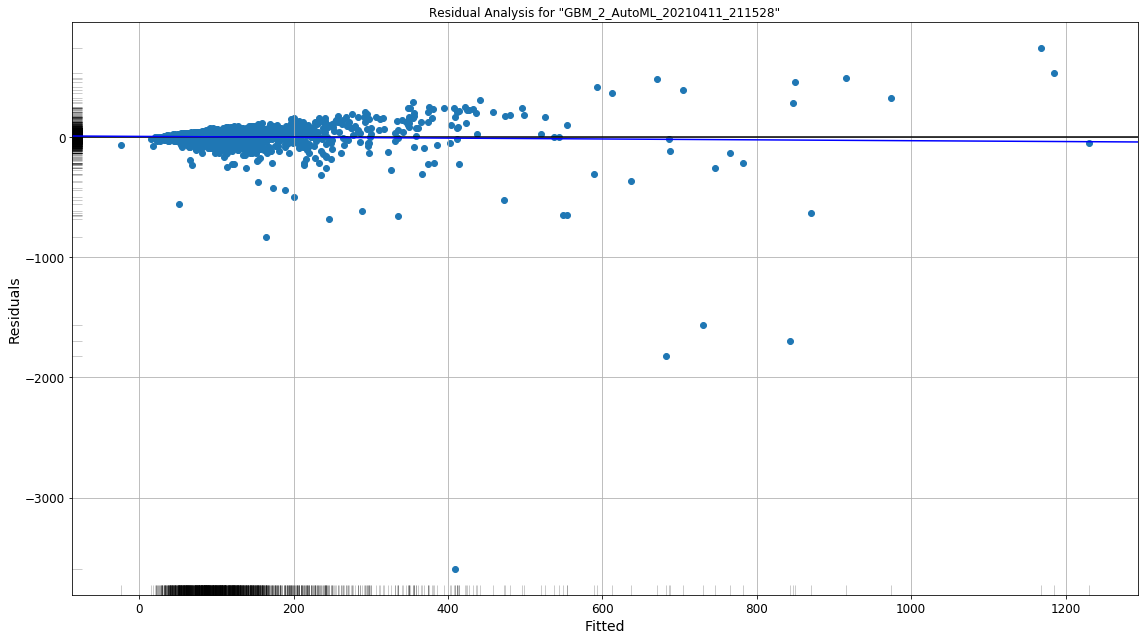

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

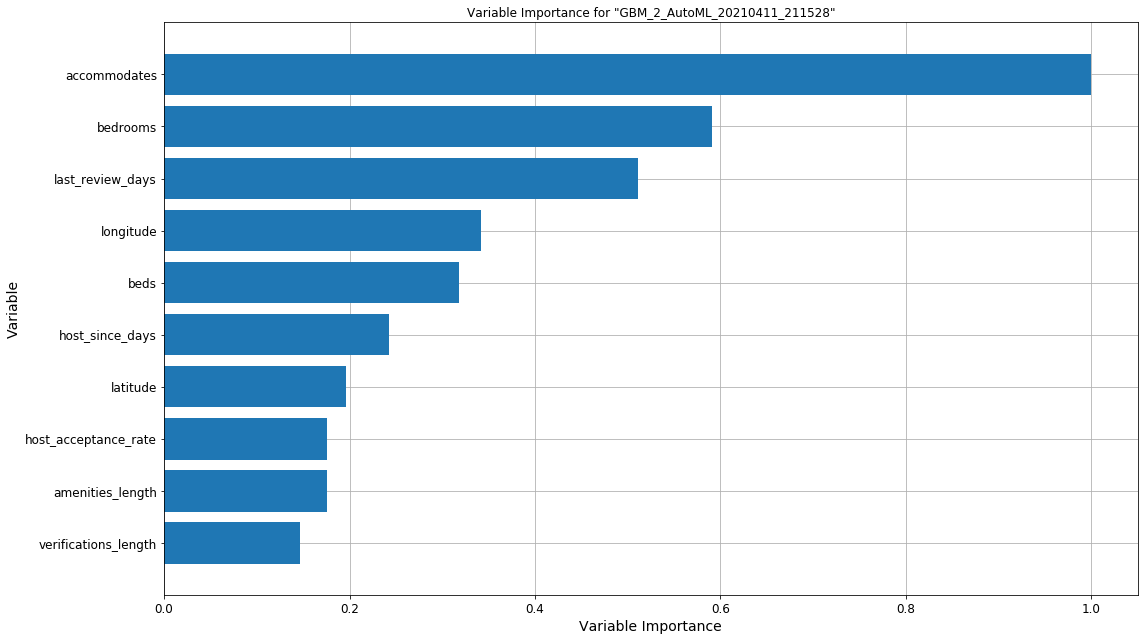

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

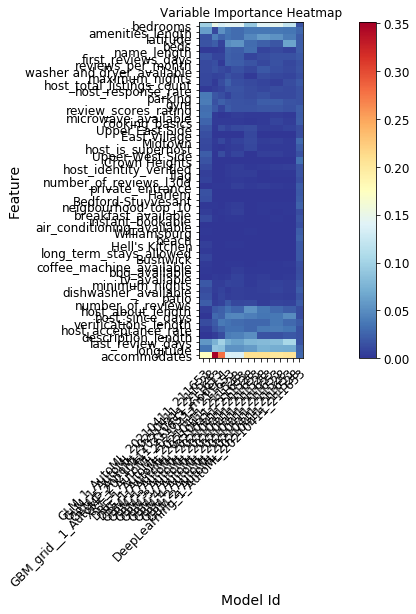

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

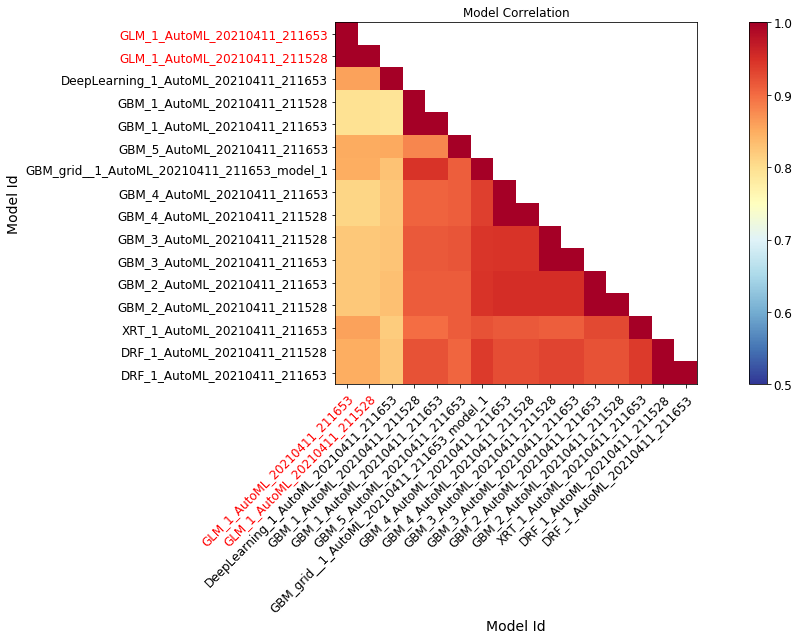

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

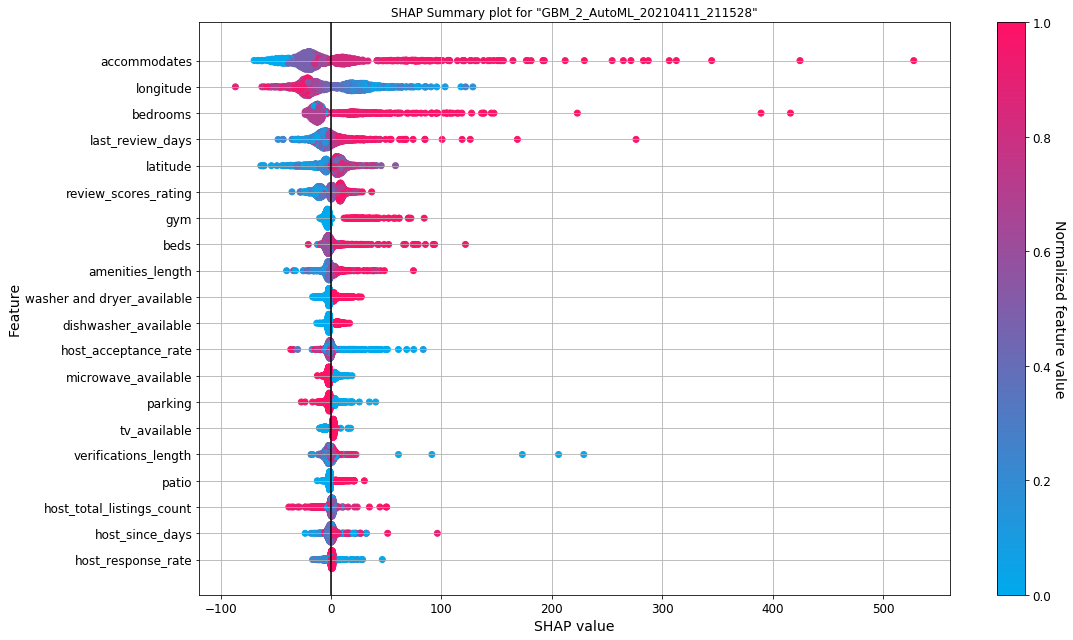

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

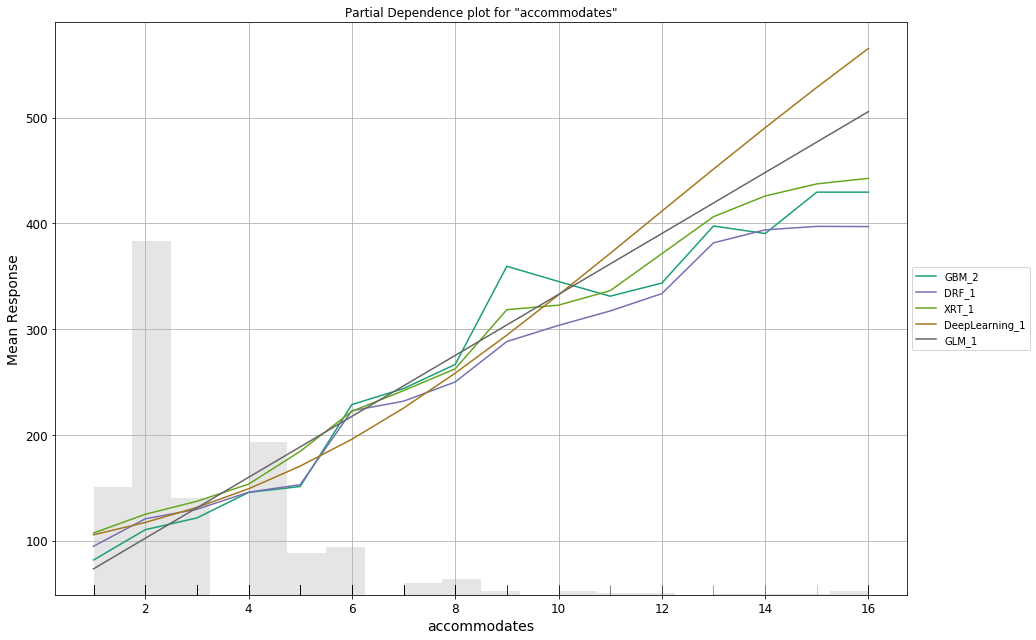

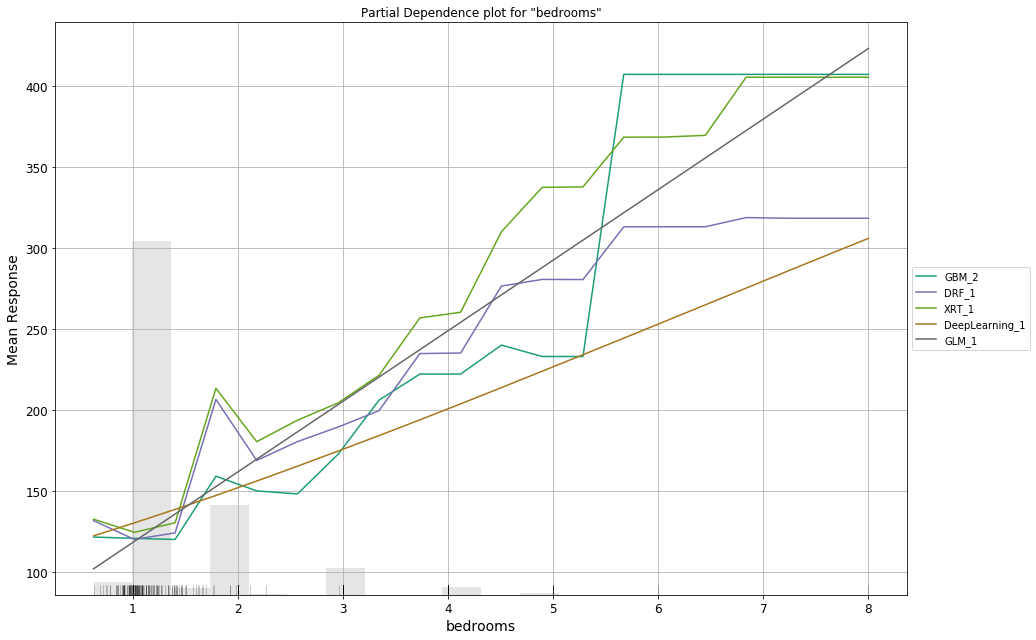

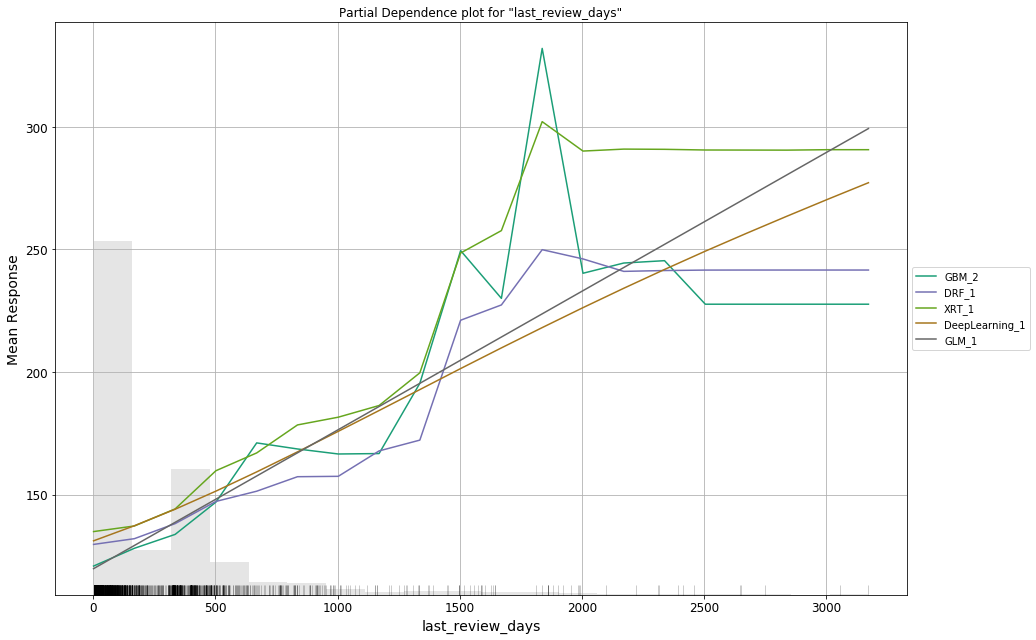

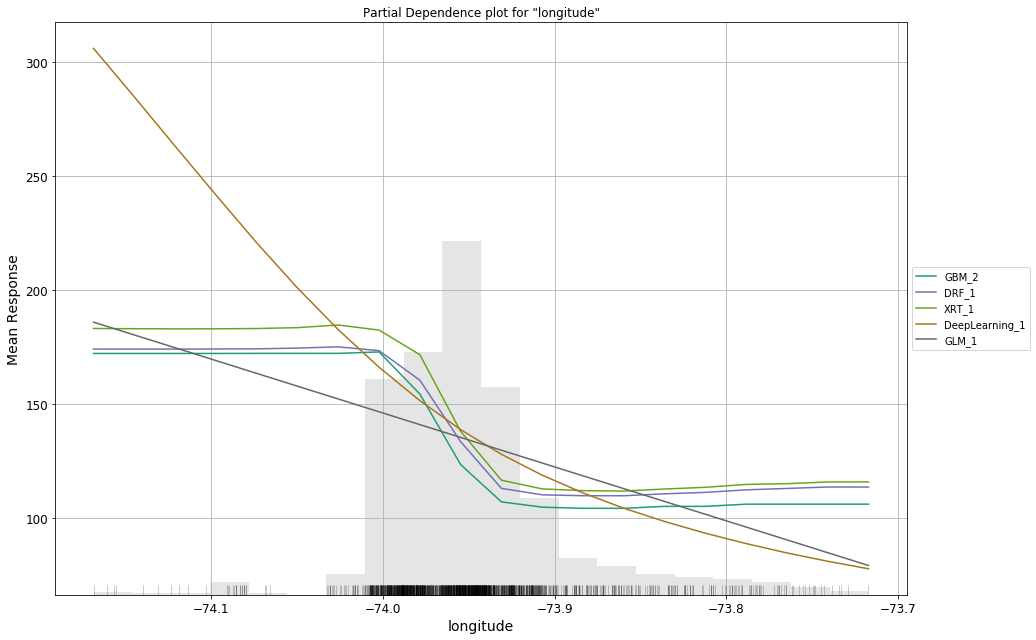

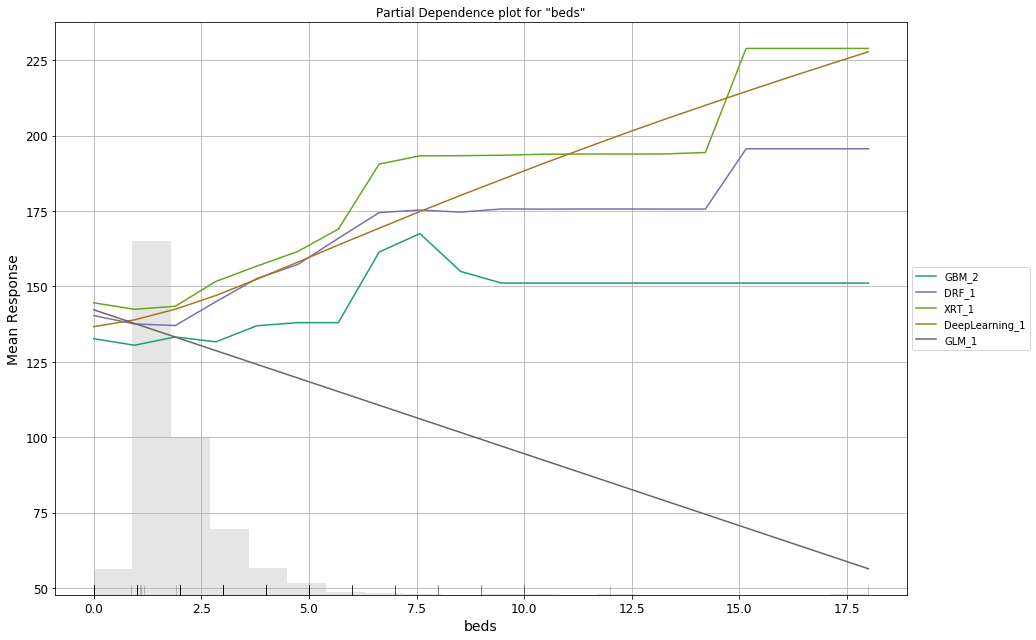

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

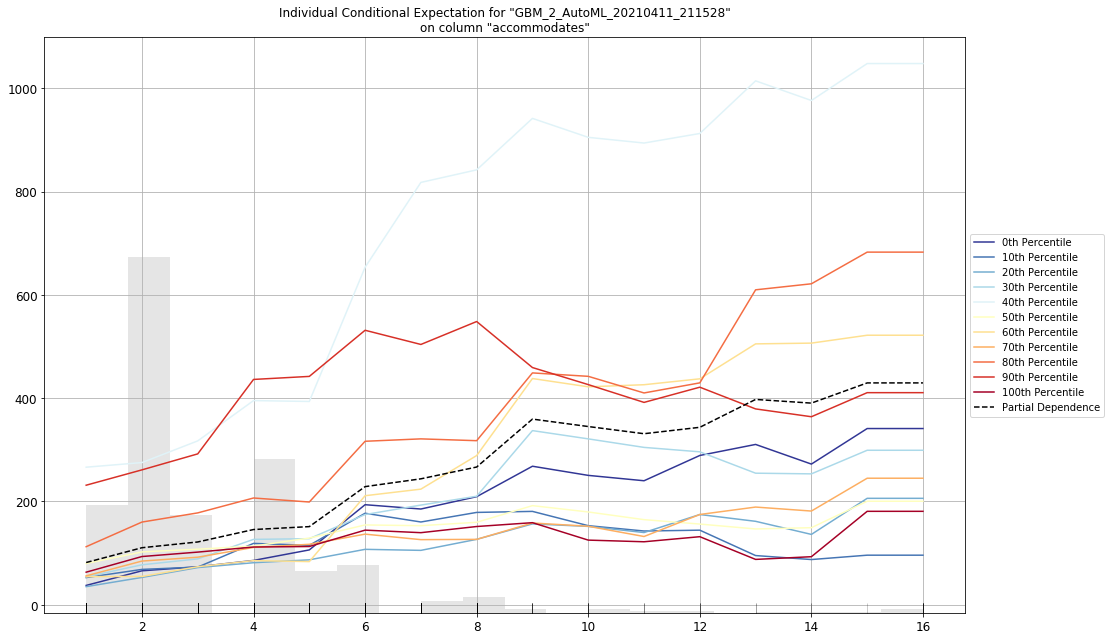

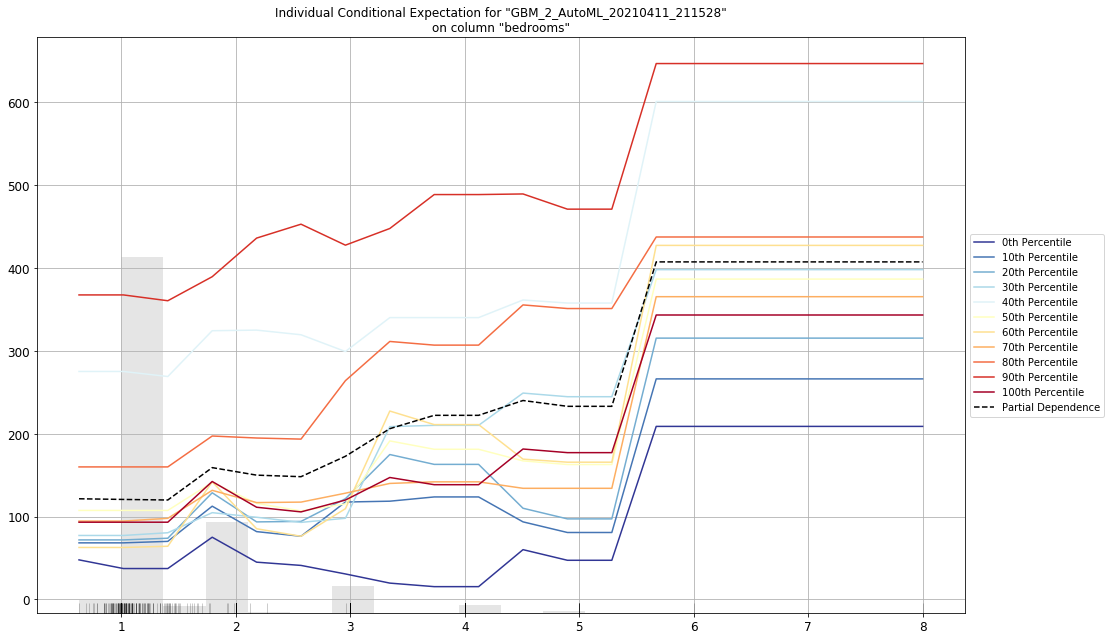

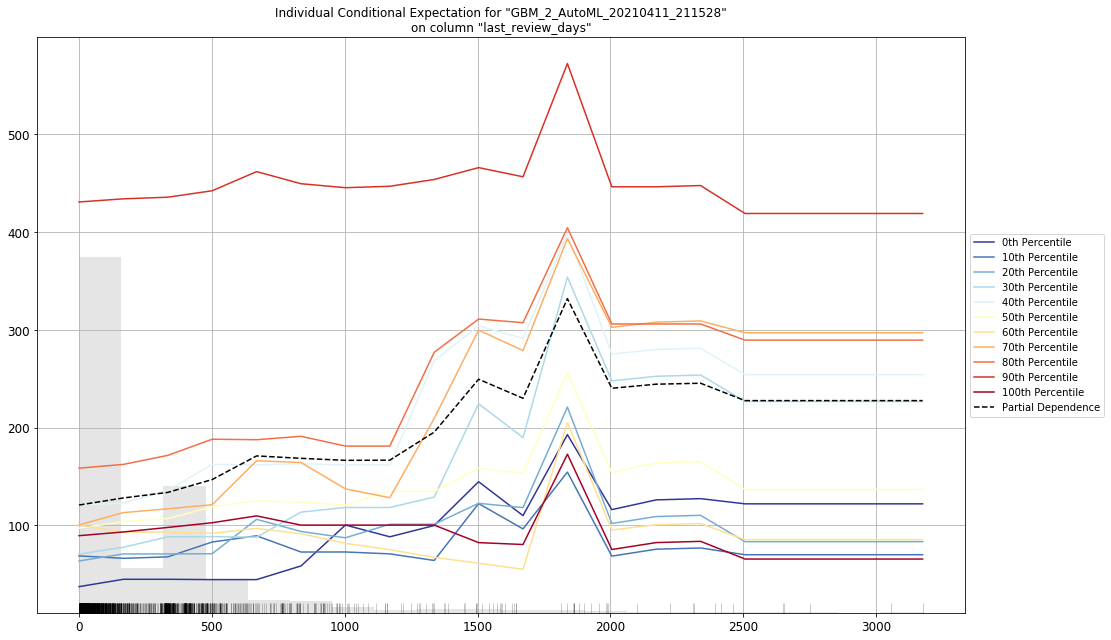

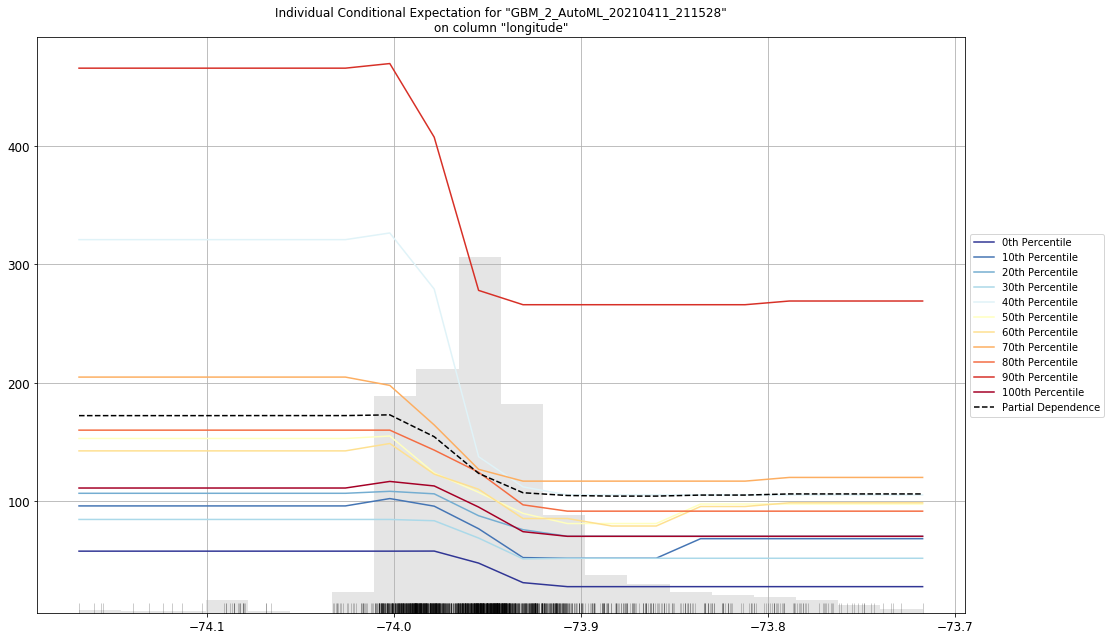

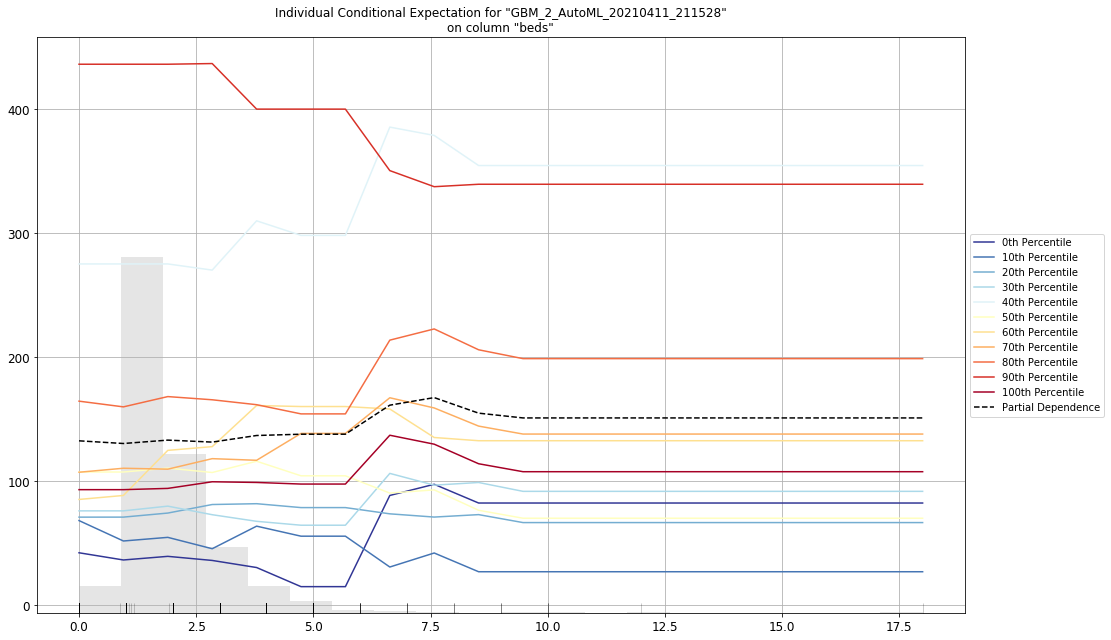

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id mean_residual_deviance rmse mse mae rmsle training_time_ms predict_time_per_row_ms algo 
 
 
 GBM_2_AutoML_20210411_211528 15923.8 126.19 15923.8 53.2565 nan 1604 0.006615 GBM 
 GBM_2_AutoML_20210411_211653 15923.8 126.19 15923.8 53.2565 nan 1286 0.003472 GBM 
 DRF_1_AutoML_20210411_211653 16050.4 126.69 16050.4 52.2755 0.445243 6048 0.004321 DRF 
 DRF_1_AutoML_20210411_211528 16050.4 126.69 16050.4 52.2755 0.445243 8882 0.004689 DRF 
 GBM_4_AutoML_20210411_211528 16090.9 126.85 16090.9 52.7316 nan 1673 0.004461 GBM 
 GBM_4_AutoML_20210411_211653 16090.9 126.85 16090.9 52.7316 nan 1744 0.004288 GBM 
 GBM_3_AutoML_20210411_211653 16193.1 127.252 16193.1 53.2394 nan 1277 0.004102 GBM 
 GBM_3_AutoML_20210411_211528 16193.1 127.252 16193.1 53.2394 nan 1507 0.004103 GBM 
 GBM_1_AutoML_20210411_211653 16282.9 127.604 16282.9 52.2298 0.451426 1039 0.003501 GBM 
 GBM_1_AutoML_20210411_211528 16282.9 127.604 16282.9 52.2298 0.451426 1456 0.003837 GBM 
 GBM_grid__1_AutoML_20210411_211653_model_1 16476.2 128.36 16476.2 53.6998 nan 1059 0.003014 GBM 
 XRT_1_AutoML_20210411_211653 16736.5 129.37 16736.5 56.3483 0.47238 6803 0.005531 DRF 
 GBM_5_AutoML_20210411_211653 17898.6 133.786 17898.6 55.2388 nan 2454 0.005828 GBM 
 DeepLearning_1_AutoML_20210411_211653 19336 139.054 19336 61.7107 nan 733 0.001195 DeepLearning 
 GLM_1_AutoML_20210411_211528 21271.3 145.847 21271.3 65.8348 nan 406 0.000381 GLM 
 GLM_1_AutoML_20210411_211653 21271.3 145.847 21271.3 65.8348 nan 241 0.000436 GLM

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

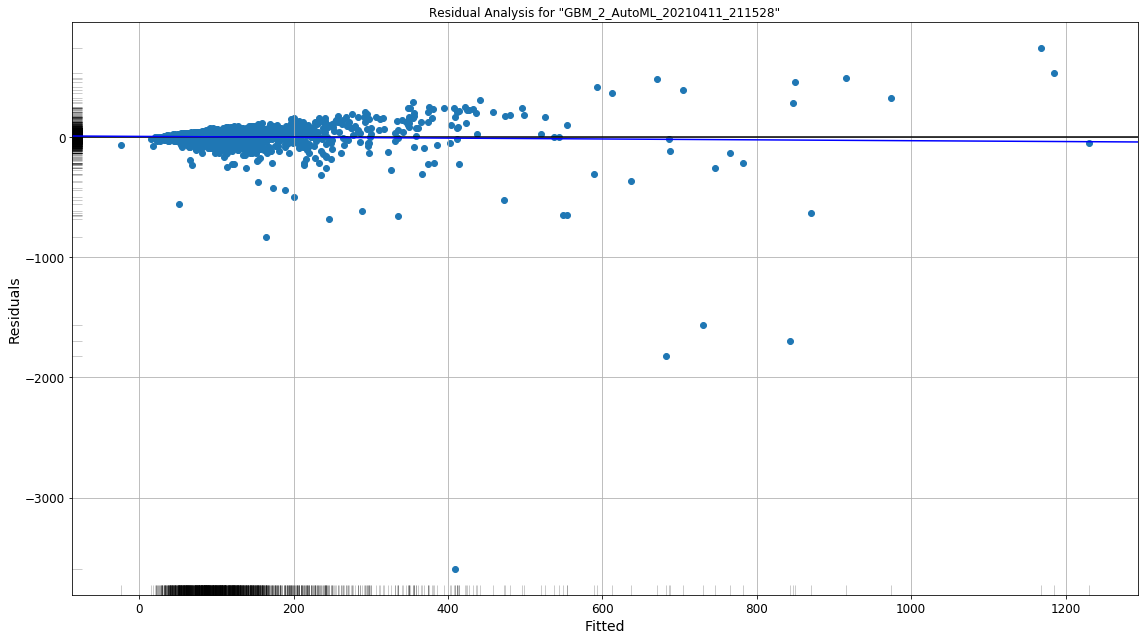

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

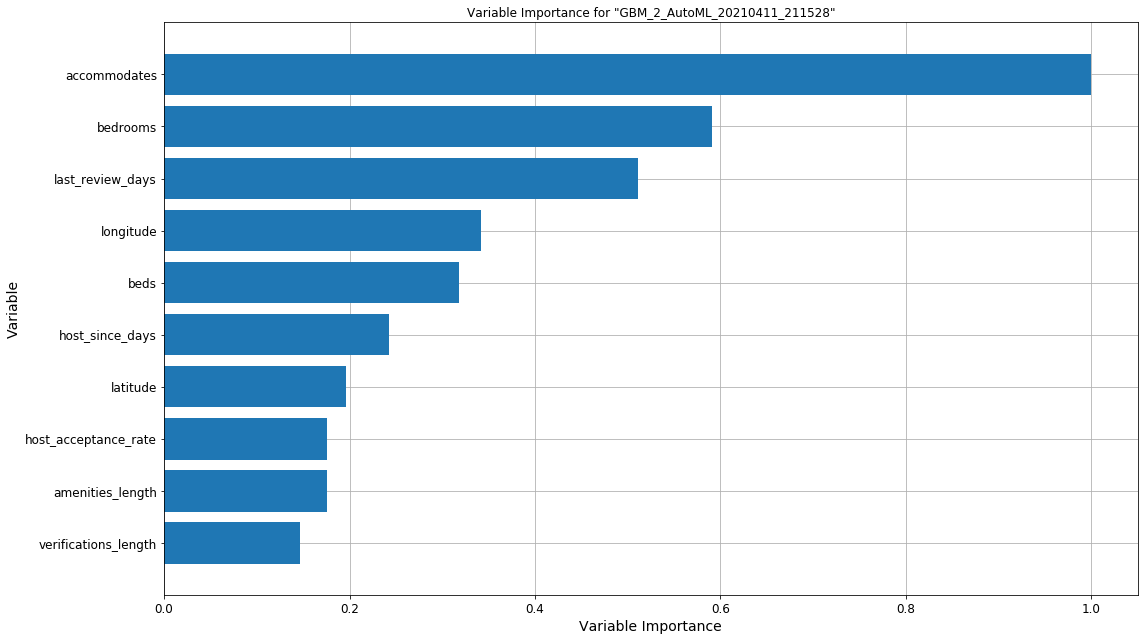

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

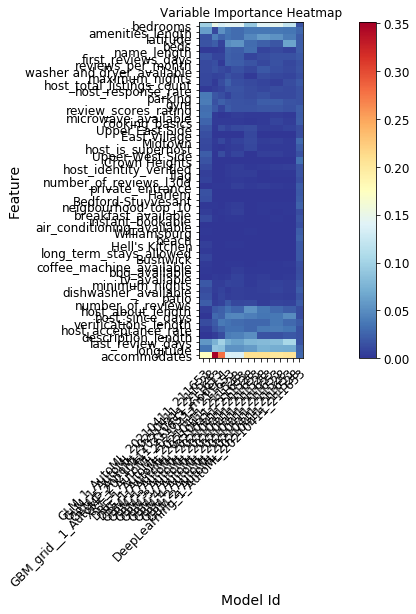

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

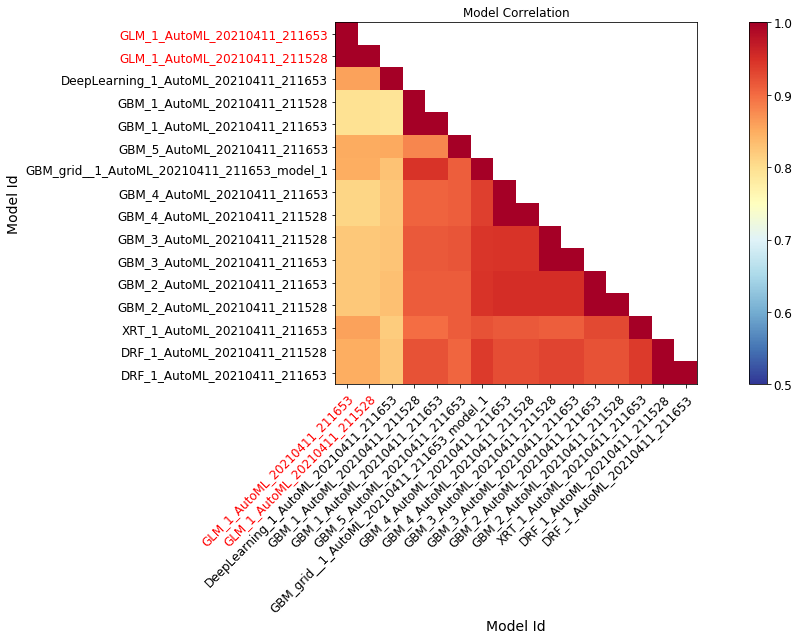

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

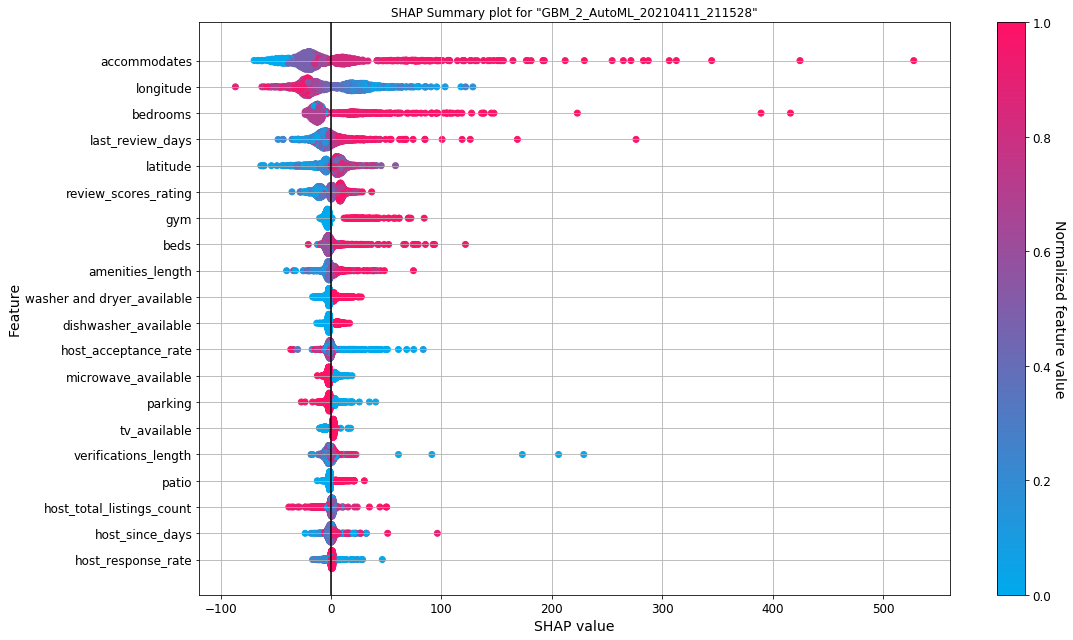

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

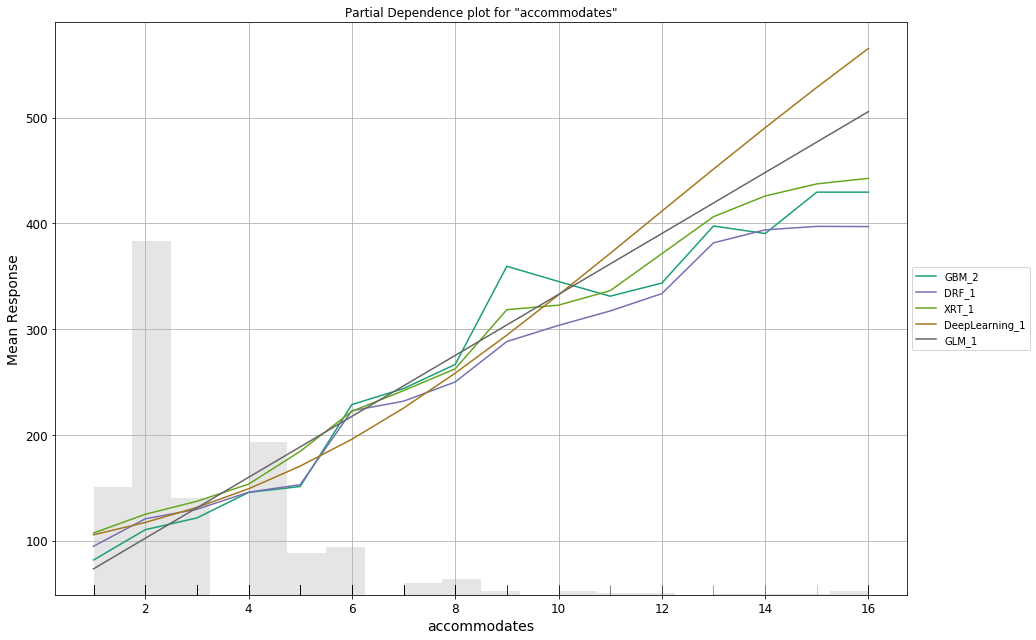

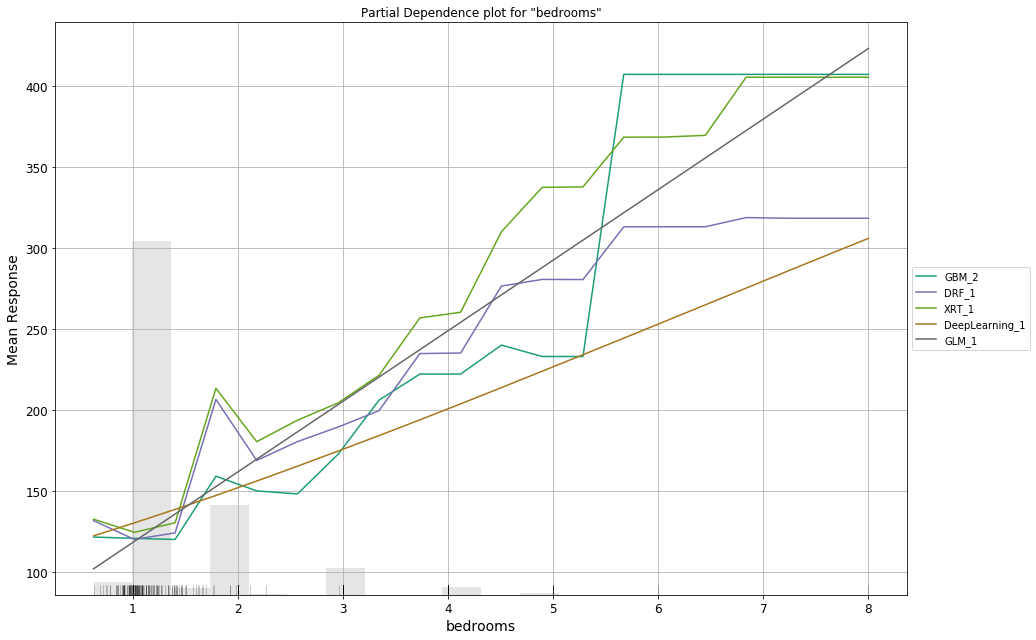

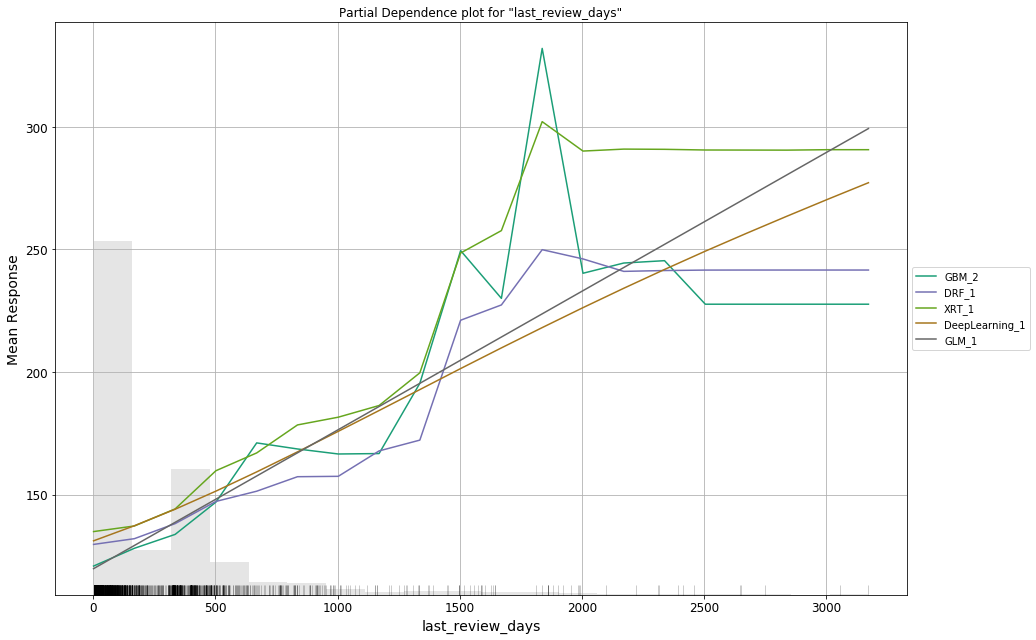

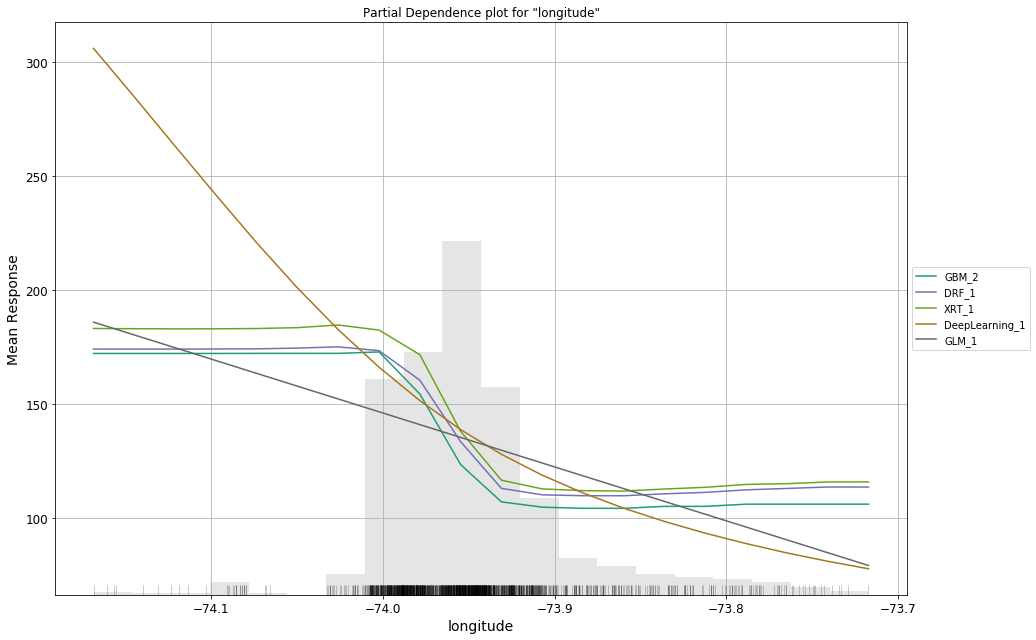

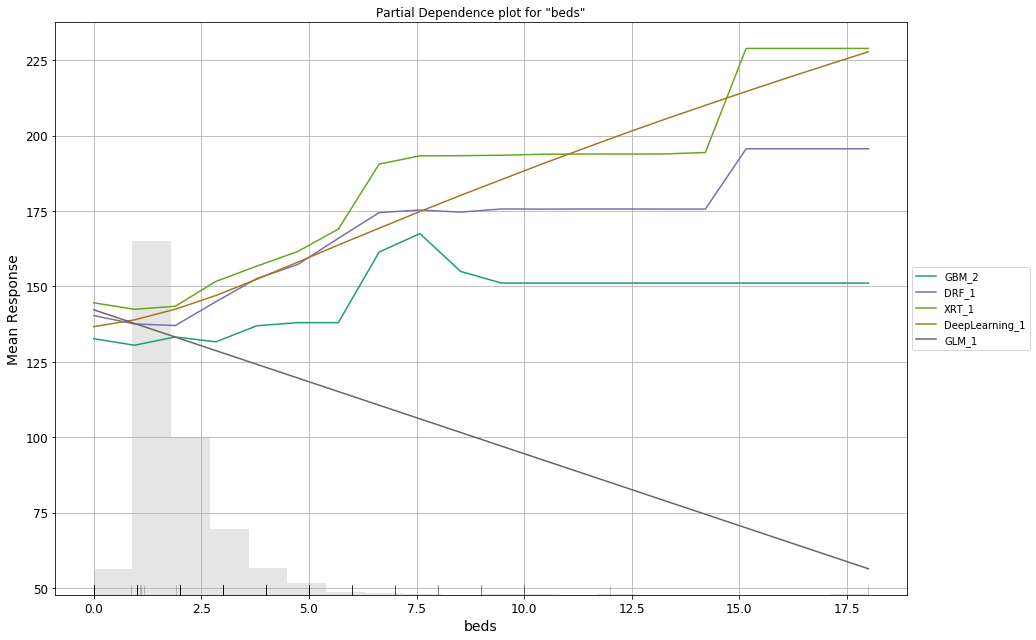

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

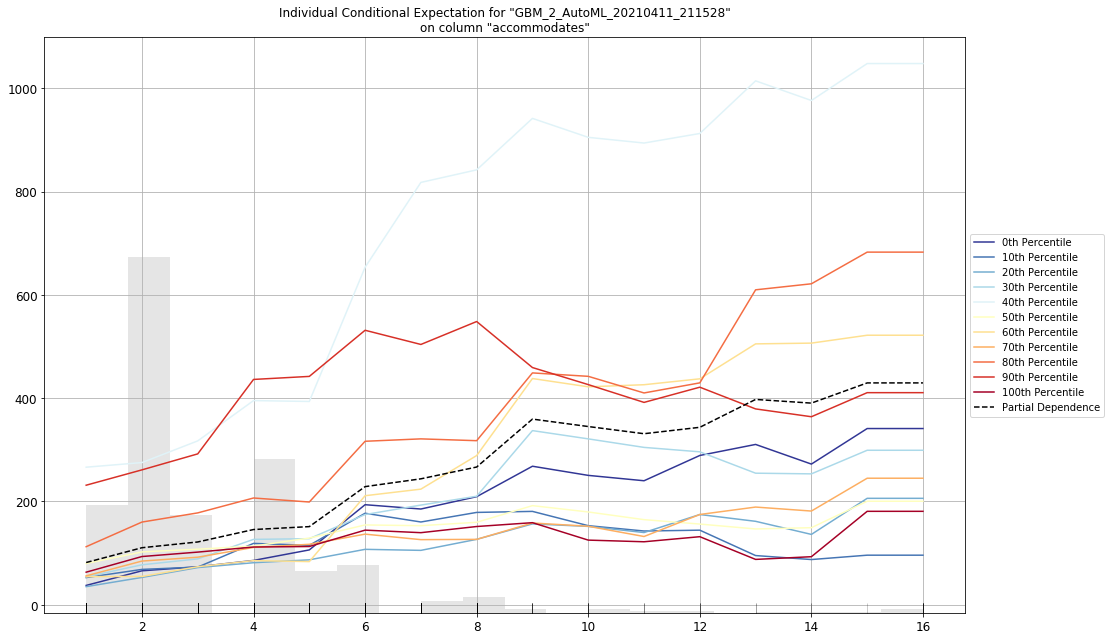

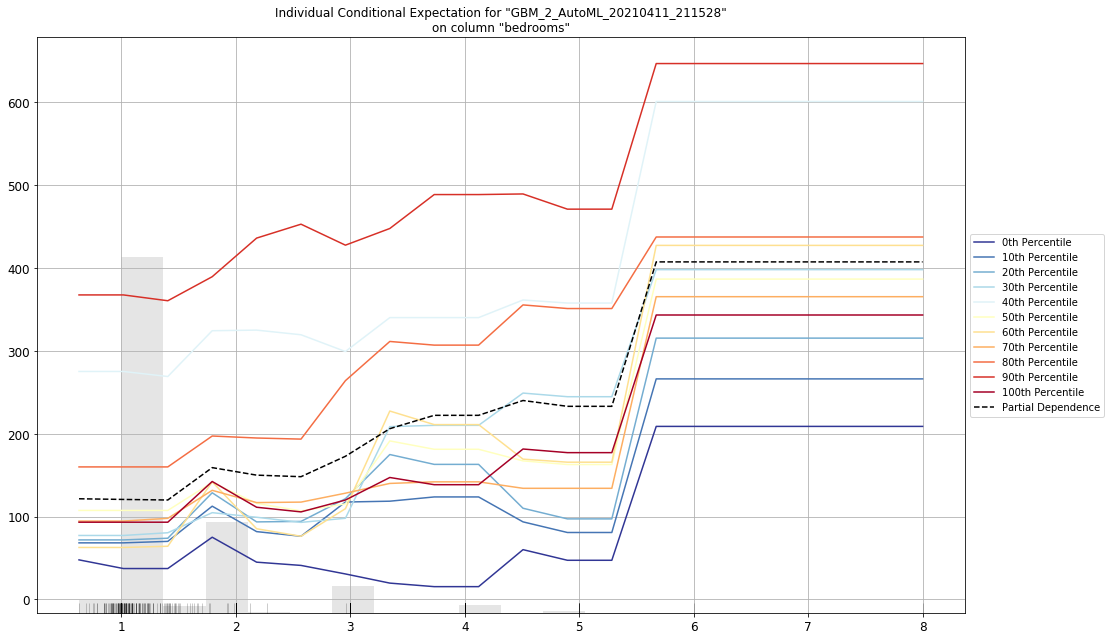

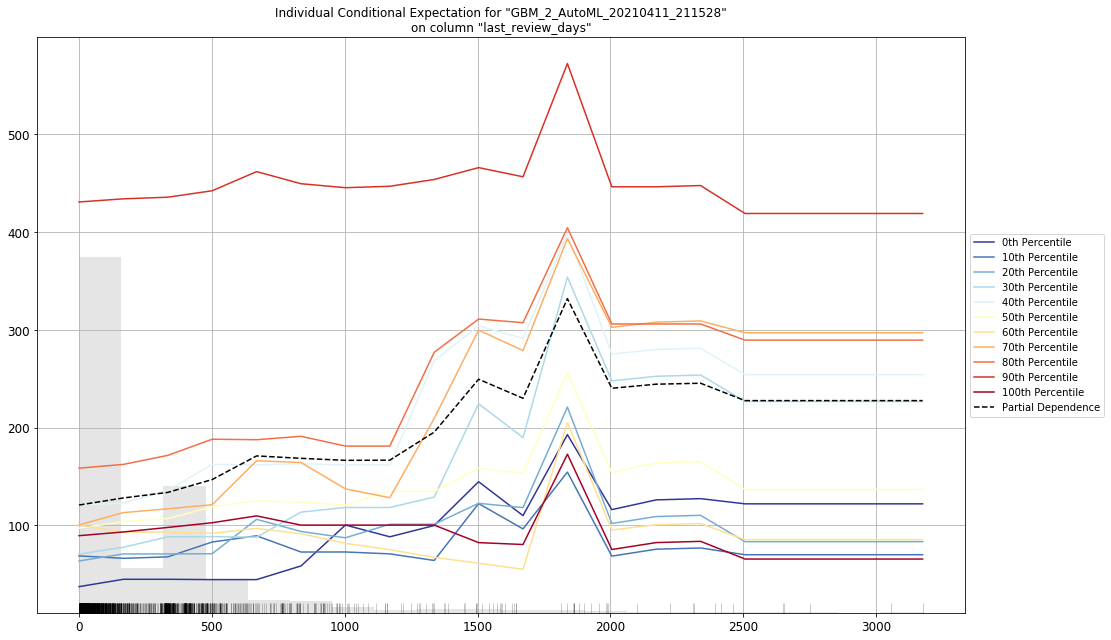

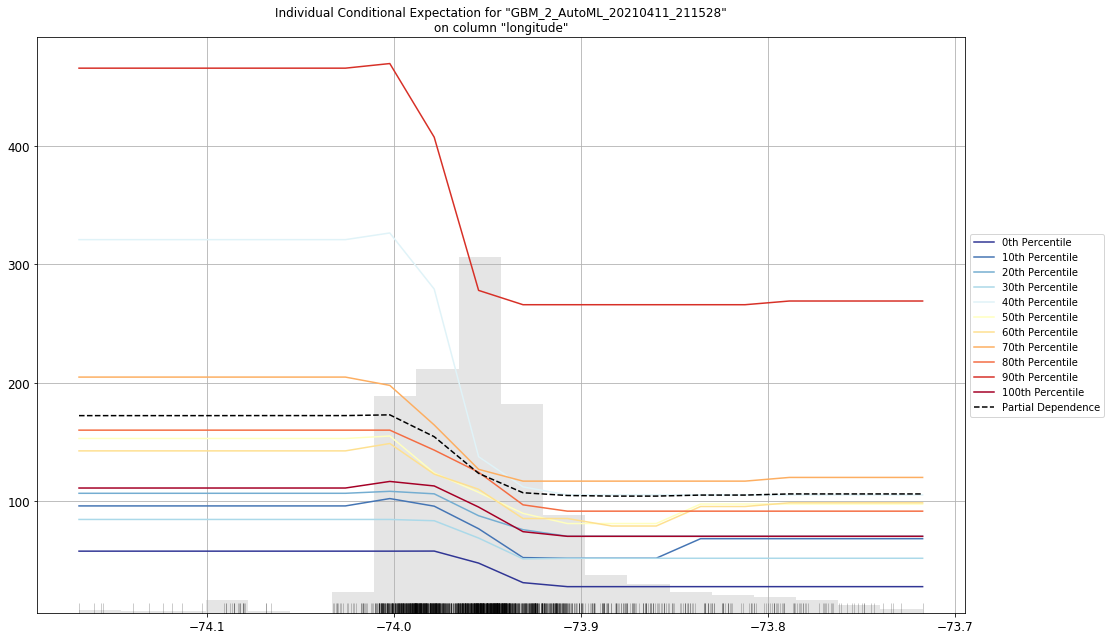

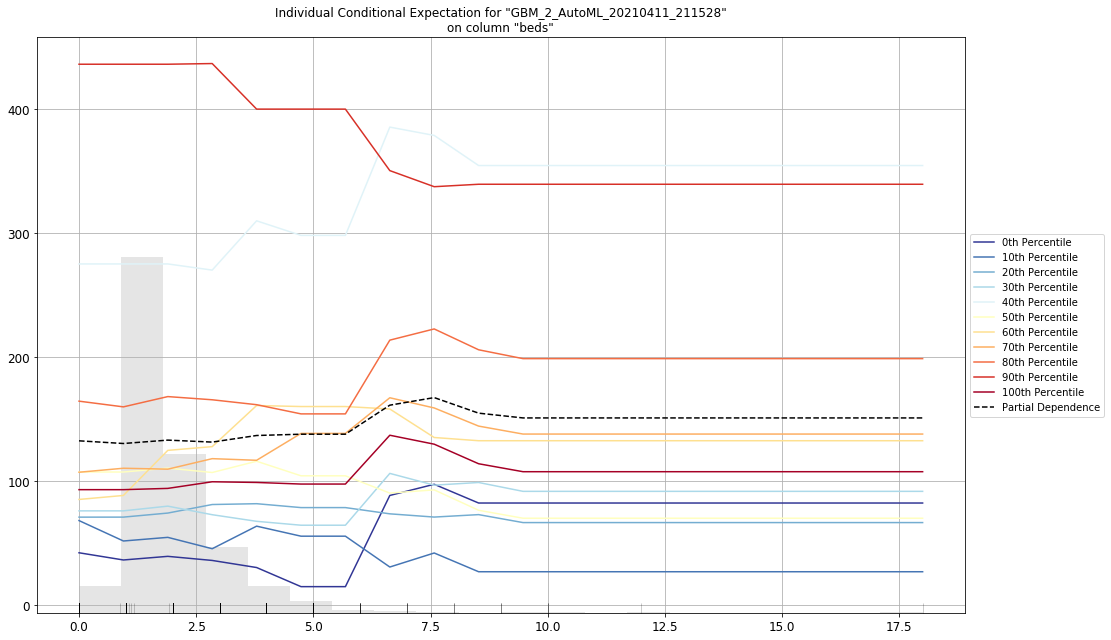

In [144]:
aml.explain(test)

**INSIGHTS:**

**Now that we have an idea of what model will perform best, we can go ahead with building of the model**

## Model Building

## Use Case 1:  For Existing Airbnb Hosts Who Want to Adjust their Prices

**RANDOM FOREST**

In [78]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_std, y_train)

RandomForestRegressor(random_state=42)

In [79]:
from sklearn.metrics import mean_squared_error
pred1 = rf.predict(X_valid_std)
rf_mse = mean_squared_error(y_valid, pred1)
rf_rmse = np.sqrt(rf_mse)
rf_rmse

89.25870935929824

**SVR**

In [80]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train_std, y_train)
predictions = svm_reg.predict(X_valid_std)
svm_mse = mean_squared_error(y_valid, pred1)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

SVR(kernel='linear')

89.25870935929824

**XGBoost**

In [81]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')
xg_reg.fit(X_train_std, y_train)

preds = xg_reg.predict(X_valid_std)
rmse = np.sqrt(mean_squared_error(y_valid, preds))
rmse

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

81.55856996597183

### Hyperparameter Tuning with MLFlow

In [82]:
!pip install mlflow
!pip install hyperopt

In [936]:
import mlflow
import mlflow.pyfunc
import mlflow.sklearn
from sklearn.model_selection import cross_val_score
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from hyperopt.pyll import scope
from IPython.display import Image
import numpy as np
import lightgbm as lgb
from lightgbm import LGBMModel,LGBMClassifier
from math import exp
import mlflow.xgboost
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error

search_space = {"max_depth":scope.int(hp.quniform("max_depth",2,100,5)),
                "n_estimators":scope.int(hp.quniform("n_estimators",2,100,1)),
                #"num_leaves": scope.int(hp.quniform("num_leaves",2,50,1)),
                "reg_alpha": hp.loguniform('reg_li',-5,5),
                "random_state":1,
                "learning_rate": hp.loguniform("learning_rate", np.log(0.01), np.log(0.5)),
                "min_child_weight": hp.uniform('min_child_weight', 0.5, 10),
                #"boosting": hp.choice("boosting",["gbdt","dart","goss"]),
                "objective":"reg:squarederror"
}

def train_model(parameters):
    mlflow.xgboost.autolog()
    with mlflow.start_run(nested=True):
        booster = xgb.XGBRegressor()
        booster.set_params(**parameters)
        booster.fit(X_train,y_train)
        
        mlflow.log_params(parameters)
        
        score = cross_val_score(booster, X_train, y_train, cv=5, 
                               scoring = "neg_mean_squared_error",n_jobs=-1)
        mean_score = np.mean(score)
        
        mlflow.log_metric('neg_mean_squared_error', mean_score)
        
        return{'status':STATUS_OK,
               "loss":-1*mean_score,
               'booster':booster.get_params}
    
with mlflow.start_run(run_name='airbnb'):
    best_params = fmin(
        fn=train_model,
        space=search_space,
        algo=tpe.suggest,
        max_evals = 5,
        trials = Trials(),
        rstate=np.random.RandomState(1)
    )

  0%|                                                                            | 0/5 [00:00<?, ?trial/s, best loss=?]

ERROR:hyperopt.fmin:job exception: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.


  0%|                                                                            | 0/5 [00:09<?, ?trial/s, best loss=?]


BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [ ]:
!mlflow ui

In [935]:
from hyperopt import fmin, tpe, hp, SparkTrials, Trials, STATUS_OK
from hyperopt.pyll import scope
from math import exp
import mlflow.xgboost
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_squared_error

def params_to_xgb(params):
    return{
        'objective': 'reg:squarederror',
        #'eval_metric': 'rmse',
        'max_depth': int(params['max_depth']),
        'learning_rate': exp(params['learning_rate']),
        'reg_alpha': exp(params['reg_alpha']),
        'reg_lambda': exp(params['reg_lambda']),
        'gamma': exp(params['gamma']),
        'min_child_weight': exp(params['min_child_weight']),
       # 'importance_type': 'total_gain',
        'seed': 0
  }

search_space = {
  'max_depth': hp.quniform('max_depth', 20, 60, 1),
  'learning_rate': hp.uniform('learning_rate', -3, 0),
  'reg_alpha': hp.uniform('reg_alpha', -5, -1),
  'reg_lambda': hp.uniform('reg_lambda', -6, -1),
  'gamma': hp.uniform('gamma', -6, -1),
  'min_child_weight': hp.uniform('min_child_weight', -1, 3),
  'n_jobs': -1,
  'objective': 'reg:squarederror',
  'seed': 123,
}

def train_model(params):
    mlflow.xgboost.autolog()
    with mlflow.start_run(nested=True):
        train=xgb.DMatrix(data=X_train_std, label=y_train)
        test=xgb.DMatrix(data=X_valid_std, label=y_valid)
        booster = xgb.train(params=params_to_xgb(params), dtrain=train, num_boost_round=10,\
                            evals=[(test, "test"), (train, "train")], early_stopping_rounds=50)
        predictions = booster.predict(test)
        mse = mean_squared_error(y_test, predictions)
        mlflow.log_metric('mse', mse)
        mlflow.log_params(params_to_xgb(params))

        signature=infer_signature(train, booster.predict(train))
        mlflow.xgboost.log_model(booster, 'model', signature=signature)

        #mlflow.log_param('best_iteration', booster.attr('best_iteration'))
        return {'status':STATUS_OK, 'loss': -1*mse, 'booster':booster.attributes()}

#spark_trials = SparkTrials(parallelism=4)

with mlflow.start_run():
    best_params = fmin(fn=train_model, space=search_space, algo=tpe.suggest, max_evals=10, rstate=np.random.RandomState(123))

[0]	test-rmse:135.24179	train-rmse:105.06630                                                                           

[1]	test-rmse:140.42854	train-rmse:36.57174                                                                            

[2]	test-rmse:144.32243	train-rmse:12.78302                                                                            

[3]	test-rmse:146.25366	train-rmse:4.51458                                                                             

[4]	test-rmse:146.98730	train-rmse:1.62047                                                                             

[5]	test-rmse:147.43514	train-rmse:0.59203                                                                             

[6]	test-rmse:147.55252	train-rmse:0.22223                                                                             

[7]	test-rmse:147.55859	train-rmse:0.08999                                                                             

[8]	test-rmse:147.57144	train-rm

ERROR:hyperopt.fmin:job exception: Found input variables with inconsistent numbers of samples: [5921, 8883]


  0%|                                                                           | 0/10 [00:02<?, ?trial/s, best loss=?]


ValueError: Found input variables with inconsistent numbers of samples: [5921, 8883]

### Final Model for Use Case 1
**Test Model on Test Set**

### Pre-Process Test Set

In [83]:
#Flag Missing Values
miss_values = missing_values(test_set)
cols = miss_values.index
df_try = test_set[cols].isnull().astype(int).add_suffix('_indicator')

#merge both the df1 and the flagged columns
test_set = pd.merge(test_set, df_try, left_index=True, right_index=True)

#Iterative Imputer
df_num = test_set.drop(columns=['host_response_time', 'neighbourhood_group_cleansed','name_bath', 'room_type'])
imp = IterativeImputer(random_state=0)
df_num1 = imp.fit_transform(df_num)
cols = list(df_num)
df_num1=pd.DataFrame(df_num1)
df_num1.columns=cols
test_set[cols] = df_num1[cols].values

#categorical encoding
test_set['host_response_time'] = test_set['host_response_time'].fillna("within an hour")
test_set = pd.get_dummies(test_set, columns=['host_response_time','neighbourhood_group_cleansed','name_bath', 'room_type'])

#drop correlated variables
#val = val.drop(['Complain_0','Gender_Male','CityTier_3', 'PreferredLoginDevice_Computer'], axis=1)

#Separate Features and Target
y_test = test_set['price']
X_test = test_set.drop(columns=['price'])

#drop most useless variables from feature selection
#X_val = X_val.drop(['PreferedOrderCat_Others','PreferedOrderCat_Grocery','CityTier_2','MaritalStatus_Divorced','PreferredPaymentMode_UPI','PreferedOrderCat_Fashion'], axis=1)

#standardize the data
sc = StandardScaler()
X_test_std = sc.fit_transform(X_test)

Dataframe has 57 columns.
There are 18 columns that have missing values.


**Test Model on Test Set**

In [ ]:
Test the model here

## Use Case 2:  New Airbnb Users Who Want to Know What Price to Set for their New Listing

**Edit the X_train to exclude data that may cause data leakage**

**RANDOM FOREST**

**SVR**

**XGBOOST**

**HYPERPAREMETER TUNING WITH MLFLOW HYPEROPT**

**TEST FINAL MODEL ON TEST SET**

# ~ EXTRA ~

In [77]:
#Get the statistic value for each numerical columns
df1.describe()

host_response_rate  host_acceptance_rate  host_is_superhost  \
count        2.662800e+04          2.662800e+04       26628.000000   
mean         2.155454e+01          3.312656e+01           0.244179   
std          9.688831e+03          6.339765e+03           0.429607   
min         -1.580810e+06         -1.034357e+06           0.000000   
25%          6.889981e+01          5.434775e+01           0.000000   
50%          8.797556e+01          7.800000e+01           0.000000   
75%          1.000000e+02          9.800000e+01           0.000000   
max          1.091831e+02          1.098492e+02           1.000000   

       host_total_listings_count  host_identity_verified      latitude  \
count               26628.000000            26628.000000  26628.000000   
mean                    9.837652                0.808097     40.728428   
std                    80.418748                0.393805      0.055751   
min                     0.000000                0.000000     40.508680   
25%                     1.000000                1.000000     40.688250   
50%                     1.000000                1.000000     40.723125   
75%                     2.000000                1.000000     40.762593   
max                  2739.000000                1.000000     40.910780   

          longitude  accommodates      bedrooms          beds  ...  \
count  26628.000000  26628.000000  26628.000000  26628.000000  ...   
mean     -73.949712      2.866006      1.296017      1.562282  ...   
std        0.049463      1.845233      0.736289      1.158847  ...   
min      -74.239860      1.000000      0.502217      0.000000  ...   
25%      -73.983072      2.000000      1.000000      1.000000  ...   
50%      -73.954725      2.000000      1.000000      1.000000  ...   
75%      -73.932540      4.000000      1.055631      2.000000  ...   
max      -73.710870     16.000000     50.412039     42.000000  ...   

       neigbourhood_top_10          flag  host_response_time_indicator  \
count         26628.000000  26628.000000                  26628.000000   
mean              0.461657      0.294277                      0.490236   
std               0.498537      0.455725                      0.499914   
min               0.000000      0.000000                      0.000000   
25%               0.000000      0.000000                      0.000000   
50%               0.000000      0.000000                      0.000000   
75%               1.000000      1.000000                      1.000000   
max               1.000000      1.000000                      1.000000   

       host_response_rate_indicator  host_acceptance_rate_indicator  \
count                  26628.000000                    26628.000000   
mean                       0.490236                        0.352974   
std                        0.499914                        0.477904   
min                        0.000000                        0.000000   
25%                        0.000000                        0.000000   
50%                        0.000000                        0.000000   
75%                        1.000000                        1.000000   
max                        1.000000                        1.000000   

       bedrooms_indicator  description_indicator  beds_indicator  \
count        26628.000000           26628.000000    26628.000000   
mean             0.094637               0.017162        0.004845   
std              0.292719               0.129879        0.069435   
min              0.000000               0.000000        0.000000   
25%              0.000000               0.000000        0.000000   
50%              0.000000               0.000000        0.000000   
75%              0.000000               0.000000        0.000000   
max              1.000000               1.000000        1.000000   

       bathrooms_text_indicator  name_indicator  
count                   26628.0         26628.0  
mean                        0.0             0.0  
std     

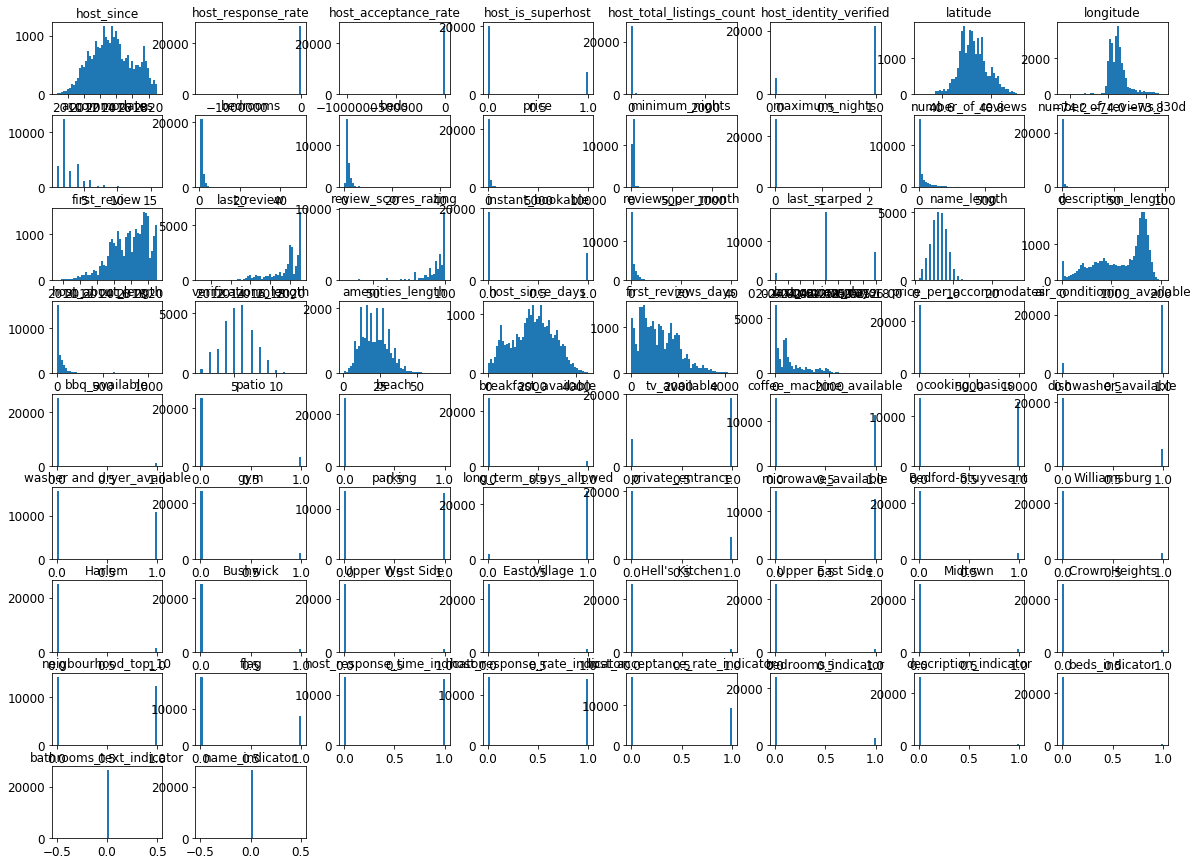

<Figure size 432x288 with 0 Axes>

In [78]:
# Get the numerical columns' distribution
import matplotlib.pyplot as plt
df1.hist(bins=50, figsize=(20,15),grid=False)

plt.show()
plt.savefig("attribute_histogram_plots.png")

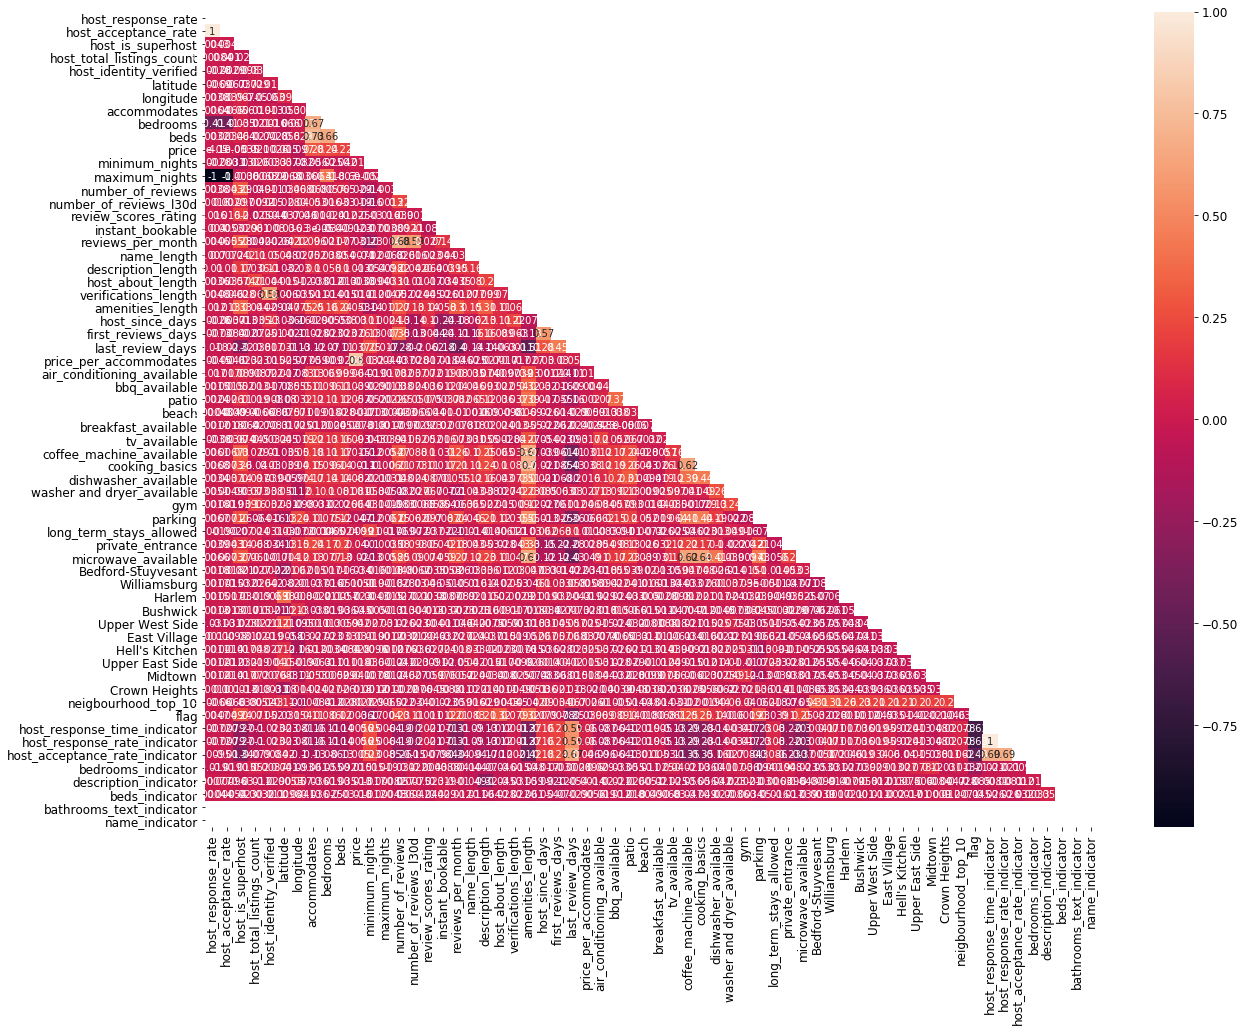

In [79]:
#Plot the correlation plot among the numerical varaibles
import seaborn as sns
matrix = np.triu(df1.corr())
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(df1.corr(), annot = True,mask=matrix)

fig.show()
plt.savefig("correlation_plot")

### 4. Split test and train sets

In [80]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [81]:
df_drop_na=df1.dropna()

In [82]:
df_drop_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8911 entries, 0 to 26630
Data columns (total 81 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   last_scraped                    8911 non-null   object        
 1   name                            8911 non-null   object        
 2   description                     8911 non-null   object        
 3   host_name                       8911 non-null   object        
 4   host_since                      8911 non-null   datetime64[ns]
 5   host_about                      8911 non-null   object        
 6   host_response_time              8911 non-null   object        
 7   host_response_rate              8911 non-null   float64       
 8   host_acceptance_rate            8911 non-null   float64       
 9   host_is_superhost               8911 non-null   float64       
 10  host_total_listings_count       8911 non-null   float64       
 11  hos

# Discover and visualize the data to gain insights

### 1. Draw the word cloud for text variables

### 3. Get the general insight for Airbnb dataset

In [76]:
#get the data type for each column of variable
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26628 entries, 0 to 26632
Data columns (total 81 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   last_scraped                    26628 non-null  object        
 1   name                            26628 non-null  object        
 2   description                     26171 non-null  object        
 3   host_name                       26628 non-null  object        
 4   host_since                      26628 non-null  datetime64[ns]
 5   host_about                      17073 non-null  object        
 6   host_response_time              13574 non-null  object        
 7   host_response_rate              26628 non-null  float64       
 8   host_acceptance_rate            26628 non-null  float64       
 9   host_is_superhost               26628 non-null  float64       
 10  host_total_listings_count       26628 non-null  float64       
 11  ho

The word cloud for "description", <br>
which can help us to get the most popular words for hosts to describe thier Airbnb apartments.

In [111]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator, get_single_color_func
from PIL import Image
comment_words = ' '
STOPWORDS.update(['/><br','br','&'])
stopwords = set(STOPWORDS)


sentences=''
i=0
for val in df1['description']: 

   # typecaste each val to string 
    val = str(val)
    sentences=val+sentences
    i=i+1
    if i%10000==0:
        print('finished: ',i)
   # split the value 
tokens=sentences.split()

# Converts each token into lowercase 
token=[element.lower() for element in tokens]

for words in token: 
comment_words=" ".join(str(item) for item in token)
comment_words=comment_words.replace("br", "").replace('access to','access')\
.replace('you will','').replace('the apartment','apartment').replace('apartment is','apartment')
mask = np.array(Image.open("liberty_statue.jpg"))


wordcloud = WordCloud(width = 800, height =900 , 
            stopwords = stopwords, 
            max_words=800,
            background_color="white",
            colormap='RdYlGn',
            mask=mask,
            min_font_size = 5,                      
            collocations=True,
            contour_color='lightgrey',
            contour_width=1).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (50, 30)) 
plt.imshow(wordcloud) 

plt.axis("off") 
#plt.tight_layout(pad = 0) 

plt.savefig("wordcloud_desription.jpg")

plt.show()



The word cloud for "host_about", <br>
which can help us to get the most popular words for hosts to introduce themselves

In [114]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator, get_single_color_func
from PIL import Image
comment_words = ' '
STOPWORDS.update(['/><br','br','&'])
stopwords = set(STOPWORDS)

i=0
sentences=''
for val in df1['host_about']: 

   # typecaste each val to string 
    val = str(val)
    sentences=val+sentences
    i=i+1
    if i%5000==0:
        print('finished: ',i)
   # split the value 
tokens=sentences.split()

# Converts each token into lowercase 
token=[element.lower() for element in tokens]

# for words in token: 
comment_words=" ".join(str(item) for item in token)
comment_words=comment_words.replace("br", "").replace('access to','access')\
.replace('you will','').replace('the apartment','apartment').replace('apartment is','apartment').replace('je suis','')
mask = np.array(Image.open("liberty_statue.jpg"))

image_colors = ImageColorGenerator(mask)

wordcloud = WordCloud(width = 800, height =900 , 
            stopwords = stopwords, 
            max_words=1000,
            background_color="white",
            colormap='RdYlGn',
            mask=mask,
            min_font_size = 5,                      
            collocations=True,
            contour_color='lightgrey',
            contour_width=1).generate(comment_words) 


# plot the WordCloud image                        
plt.figure(figsize = (50, 30)) 
plt.imshow(wordcloud) 
plt.axis("off") 
#plt.tight_layout(pad = 0) 

plt.savefig("wordcloud_host_about")
plt.show()


The word cloud for "name", <br>
which can help us to get the most popular words for hosts to entitle thier Airbnb apartments.

In [115]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator, get_single_color_func
from PIL import Image
comment_words = ' '
STOPWORDS.update(['/><br','br','&'])
stopwords = set(STOPWORDS)


sentences=''
for val in df1['name']: 

   # typecaste each val to string 
    val = str(val)
    sentences=val+sentences
   # split the value 
tokens=sentences.split()

# Converts each token into lowercase 
token=[element.lower() for element in tokens]

# for words in token: 
comment_words=" ".join(str(item) for item in token)
comment_words=comment_words.replace("br", "").replace('access to','access')\
.replace('you will','').replace('the apartment','apartment').replace('apartment is','apartment').replace('je suis','')
mask = np.array(Image.open("liberty_statue.jpg"))

image_colors = ImageColorGenerator(mask)

wordcloud = WordCloud(width = 800, height =900 , 
            stopwords = stopwords, 
            max_words=1000,
            background_color="white",
            colormap='RdYlGn',
            mask=mask,
            min_font_size = 5,                      
            collocations=True,
            contour_color='lightgrey',
            contour_width=1).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (50, 30)) 
plt.imshow(wordcloud) 
plt.axis("off") 
#plt.tight_layout(pad = 0) 

plt.savefig("wordcloud_name")

plt.show()

### 2. Geographic Distribution

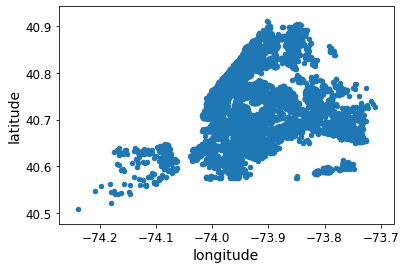

In [92]:
df1.plot(kind="scatter", x="longitude", y="latitude")
plt.savefig("bad_visualization_plot")

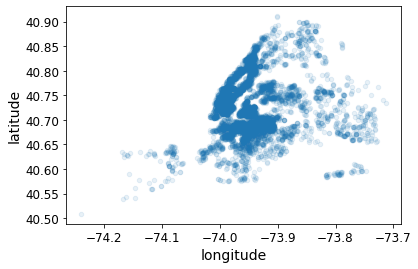

In [78]:
df1.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.savefig("better_visualization_plot")

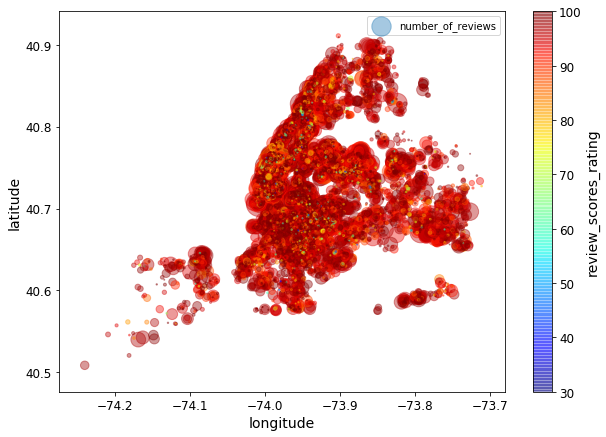

In [94]:
df1.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df1["number_of_reviews"], label="number_of_reviews", figsize=(10,7),
    c="review_scores_rating", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
plt.savefig("Airbnb_review_rating_scatterplot")

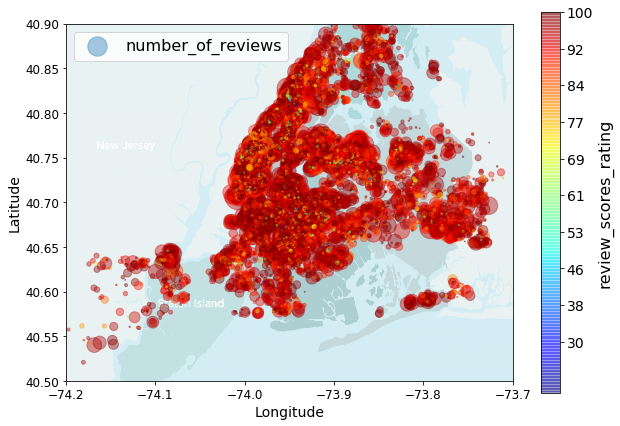

In [95]:
import matplotlib.image as mpimg
california_img=mpimg.imread('map_nyc.png')
ax = df1.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=df1["number_of_reviews"], label="number_of_reviews",
                       c="review_scores_rating", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-74.2, -73.7, 40.5, 40.90], alpha=0.4,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

rating = df1["review_scores_rating"]
tick_values = np.linspace(rating.min(), rating.max(), 10)
cbar = plt.colorbar(ticks=tick_values/rating.max())
cbar.ax.set_yticklabels([(round(v)) for v in tick_values], fontsize=14)
cbar.set_label('review_scores_rating', fontsize=16)

plt.legend(fontsize=16)
plt.savefig("Montreal_Airbnb_review_rating_scatterplot")
plt.show()

### 3. Get the correlation value between target variable ("review_scores_rating") and other predictors

In [96]:
corr_matrix2 = df1.corr()

In [97]:
corr_matrix2["review_scores_rating"].sort_values(ascending=False)

review_scores_rating        1.000000
host_is_superhost           0.197431
amenities_length            0.142137
cooking_basics              0.106990
host_since_days             0.103837
                              ...   
Midtown                    -0.059142
last_review_days           -0.061550
instant_bookable           -0.082881
bathrooms_text_indicator         NaN
name_indicator                   NaN
Name: review_scores_rating, Length: 62, dtype: float64

In [98]:
corr_matrix["review_scores_rating"].sort_values(ascending=False)

review_scores_rating          1.000000
host_is_superhost             0.197374
amenities_length              0.142010
cooking_basics                0.106899
host_since_days               0.103854
coffee_machine_available      0.103093
parking                       0.096977
dishwasher_available          0.087185
patio                         0.075272
microwave_available           0.073876
host_response_rate            0.073592
air_conditioning_available    0.071537
washer and dryer_available    0.066928
description_length            0.063413
tv_available                  0.051847
private_entrance              0.049545
verifications_length          0.045386
number_of_reviews             0.039097
bbq_available                 0.036319
reviews_per_month             0.027216
price                         0.025329
breakfast_available           0.022979
name_length                   0.022737
price_per_accommodates        0.017253
host_about_length             0.016629
bedrooms                 

### Compare the correlation value before and after adding new features, we can see that the new feature of "amenities_length","price_per_accommodates" and "has_hair_dryer" are all the predictors have the high correlation with the target variable

### 4. Draw the scatter matrix plot for the top 4 correlated varibles with review_scores_rating

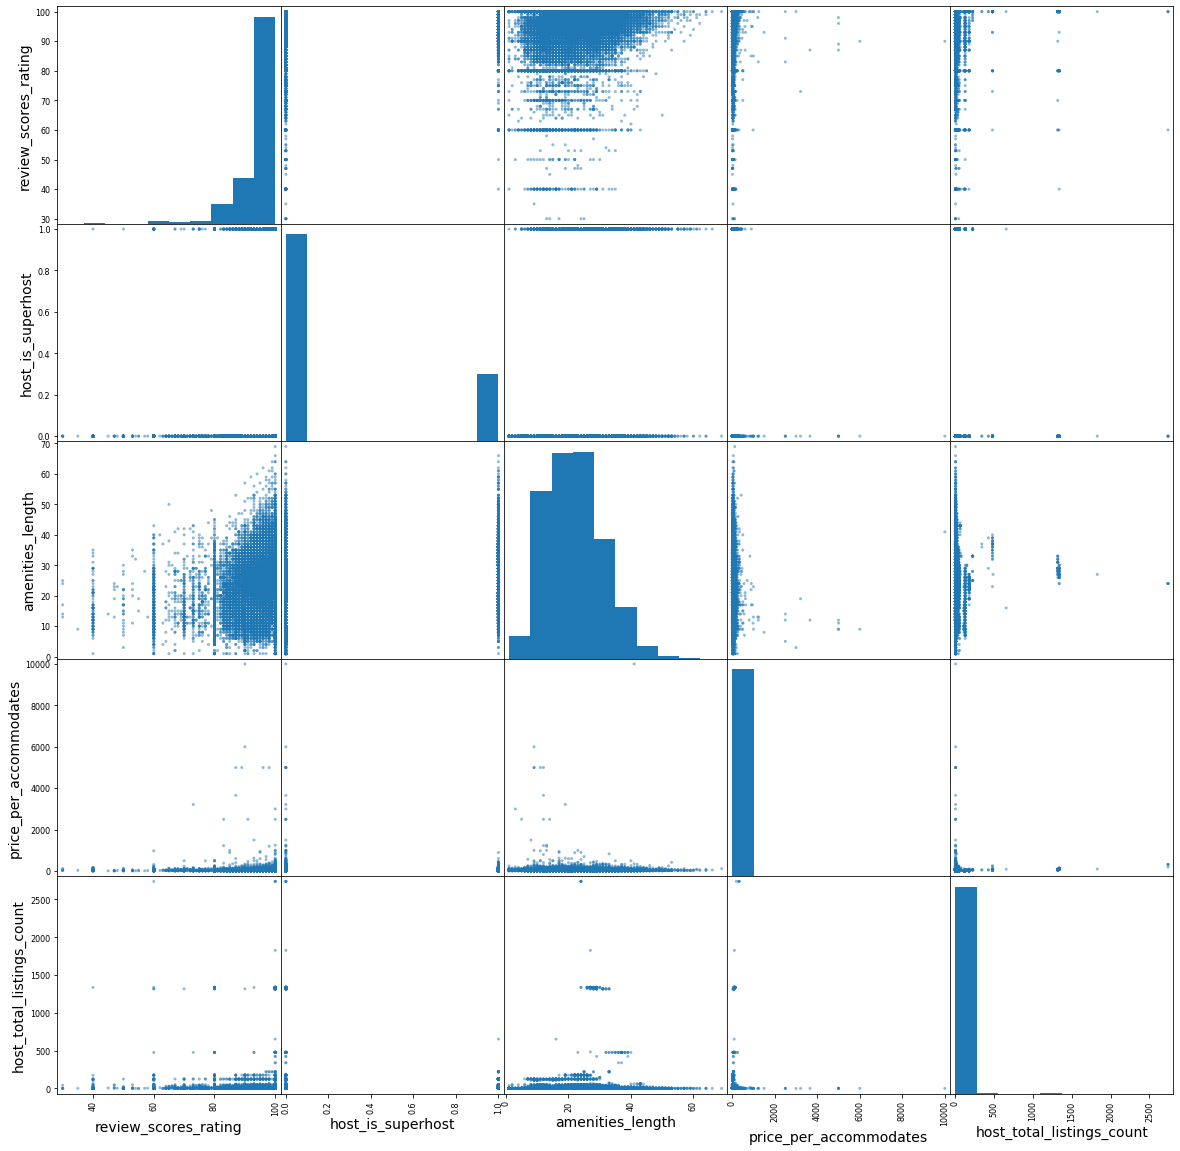

In [99]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["review_scores_rating", "host_is_superhost", "amenities_length",
              "price_per_accommodates",'host_total_listings_count']
scatter_matrix(df1[attributes], figsize=(20, 20))
plt.savefig("scatter_matrix_plot")

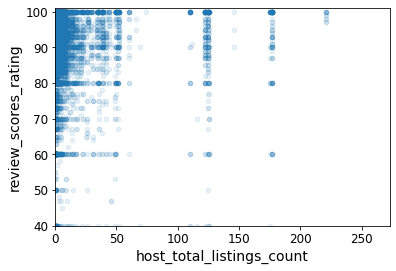

In [100]:
df1.plot(kind="scatter", x="host_total_listings_count", y="review_scores_rating",
             alpha=0.1)
plt.axis([0, 273, 40, 101])
plt.savefig("listing_counts_vs_rating_scatterplot")

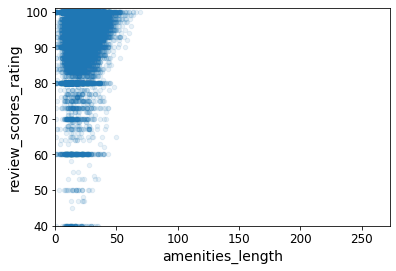

In [101]:
df1.plot(kind="scatter", x="amenities_length", y="review_scores_rating",
             alpha=0.1)
plt.axis([0, 273, 40, 101])
plt.savefig("income_vs_house_value_scatterplot")

In [102]:
df1.describe()

host_response_rate  host_acceptance_rate  host_is_superhost  \
count        2.662800e+04          2.662800e+04       26628.000000   
mean         2.155454e+01          3.312656e+01           0.244179   
std          9.688831e+03          6.339765e+03           0.429607   
min         -1.580810e+06         -1.034357e+06           0.000000   
25%          6.889981e+01          5.434775e+01           0.000000   
50%          8.797556e+01          7.800000e+01           0.000000   
75%          1.000000e+02          9.800000e+01           0.000000   
max          1.091831e+02          1.098492e+02           1.000000   

       host_total_listings_count  host_identity_verified      latitude  \
count               26628.000000            26628.000000  26628.000000   
mean                    9.837652                0.808097     40.728428   
std                    80.418748                0.393805      0.055751   
min                     0.000000                0.000000     40.508680   
25%                     1.000000                1.000000     40.688250   
50%                     1.000000                1.000000     40.723125   
75%                     2.000000                1.000000     40.762593   
max                  2739.000000                1.000000     40.910780   

          longitude  accommodates      bedrooms          beds  ...  \
count  26628.000000  26628.000000  26628.000000  26628.000000  ...   
mean     -73.949712      2.866006      1.296017      1.562282  ...   
std        0.049463      1.845233      0.736289      1.158847  ...   
min      -74.239860      1.000000      0.502217      0.000000  ...   
25%      -73.983072      2.000000      1.000000      1.000000  ...   
50%      -73.954725      2.000000      1.000000      1.000000  ...   
75%      -73.932540      4.000000      1.055631      2.000000  ...   
max      -73.710870     16.000000     50.412039     42.000000  ...   

       neigbourhood_top_10          flag  host_response_time_indicator  \
count         26628.000000  26628.000000                  26628.000000   
mean              0.461657      0.294277                      0.490236   
std               0.498537      0.455725                      0.499914   
min               0.000000      0.000000                      0.000000   
25%               0.000000      0.000000                      0.000000   
50%               0.000000      0.000000                      0.000000   
75%               1.000000      1.000000                      1.000000   
max               1.000000      1.000000                      1.000000   

       host_response_rate_indicator  host_acceptance_rate_indicator  \
count                  26628.000000                    26628.000000   
mean                       0.490236                        0.352974   
std                        0.499914                        0.477904   
min                        0.000000                        0.000000   
25%                        0.000000                        0.000000   
50%                        0.000000                        0.000000   
75%                        1.000000                        1.000000   
max                        1.000000                        1.000000   

       bedrooms_indicator  description_indicator  beds_indicator  \
count        26628.000000           26628.000000    26628.000000   
mean             0.094637               0.017162        0.004845   
std              0.292719               0.129879        0.069435   
min              0.000000               0.000000        0.000000   
25%              0.000000               0.000000        0.000000   
50%              0.000000               0.000000        0.000000   
75%              0.000000               0.000000        0.000000   
max              1.000000               1.000000        1.000000   

       bathrooms_text_indicator  name_indicator  
count                   26628.0         26628.0  
mean                        0.0             0.0  
std     

# ML models